In [8]:
#install pyDF2

# importing all the required modules
import PyPDF2
import pandas as pd

# creating an object 
file = open("Goethe-Zertifikat_A2_Wortliste.pdf", 'rb')

# creating a pdf reader object
fileReader = PyPDF2.PdfFileReader(file)

# print the number of pages in pdf file
print(fileReader.numPages)

32


WORTLISTE
meistens                Meistens trinke ich zum Frühstück nur einen Kaffee. der Moment, -e       Einen Moment, bitte.
                              Warten Sie bitte einen Moment. 
die Menge, -n         Wir haben noch eine Menge Zeit. 
                              Ich habe im Moment sehr viel zu tun.
                              Ich kenne eine Menge Leute in dieser Stadt.
morgen                  Morgen beginnt die Schule erst um zehn Uhr.
der Mensch, -en     Die Menschen sind hier ein bisschen anders als 
                              im Süden. der Motor, -en        Der Motor ist kaputt. Das Auto fährt nicht mehr.
merken, merkt,       Ich kann mir keine Zahlen merken. Ich vergesse sie  der Motorroller, -    Oskar fährt mit dem Motorroller zur Arbeit.
hat gemerkt           sofort. 
müde                      Ich bin müde. Ich gehe schlafen.
                              Merkst du, dass es wärmer wird?
der Müll (Sg.)          Bringst du bitte den Müll raus? 
die Messe, -n      

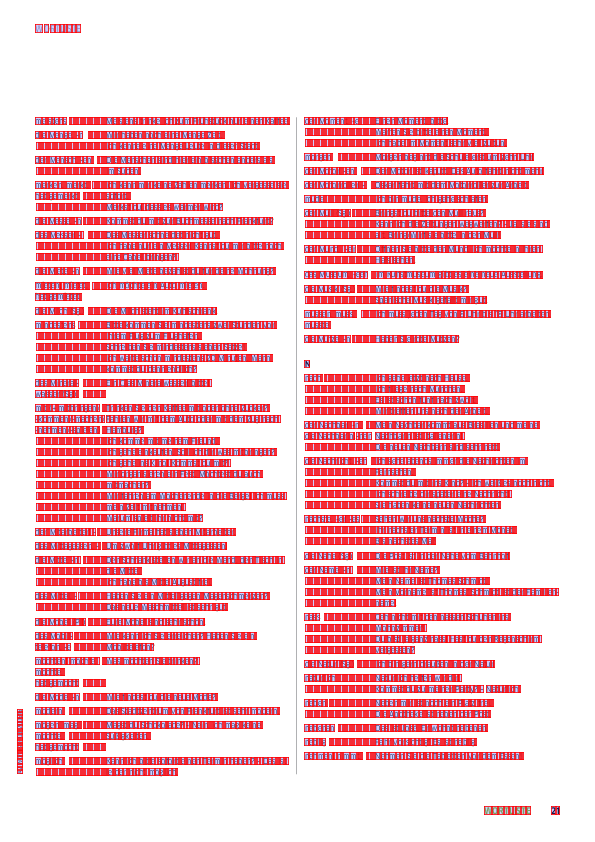

In [5]:
import requests,pdfplumber
from io import BytesIO


pdf = pdfplumber.open('Goethe-Zertifikat_A2_Wortliste.pdf')
page = pdf.pages[20]
text = page.extract_text()
print(text)
pdf.close()
im = page.to_image()
im.reset().draw_rects(page.chars)


In [19]:
text

'WORTLISTE\nmeistens                Meistens trinke ich zum Frühstück nur einen Kaffee. der Moment, -e       Einen Moment, bitte.\n                              Warten Sie bitte einen Moment. \ndie Menge, -n         Wir haben noch eine Menge Zeit. \n                              Ich habe im Moment sehr viel zu tun.\n                              Ich kenne eine Menge Leute in dieser Stadt.\nmorgen                  Morgen beginnt die Schule erst um zehn Uhr.\nder Mensch, -en     Die Menschen sind hier ein bisschen anders als \n                              im Süden. der Motor, -en        Der Motor ist kaputt. Das Auto fährt nicht mehr.\nmerken, merkt,       Ich kann mir keine Zahlen merken. Ich vergesse sie  der Motorroller, -    Oskar fährt mit dem Motorroller zur Arbeit.\nhat gemerkt           sofort. \nmüde                      Ich bin müde. Ich gehe schlafen.\n                              Merkst du, dass es wärmer wird?\nder Müll (Sg.)          Bringst du bitte den Müll raus? \ndie 

In [42]:
"   aaaa   fg".strip()

'aaaa   fg'

In [64]:
from pprint import pprint
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument, PDFNoOutlines
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTPage, LTChar, LTAnno, LAParams, LTTextBox, LTTextLine

collection = []
class PDFPageDetailedAggregator(PDFPageAggregator):
    def __init__(self, rsrcmgr, pageno=1, laparams=None):
        PDFPageAggregator.__init__(self, rsrcmgr, pageno=pageno, laparams=laparams)
        self.rows = []
        self.page_number = 0
    def receive_layout(self, ltpage):        
        def render(item, page_number):
            if isinstance(item, LTPage) or isinstance(item, LTTextBox):
                for child in item:
                    render(child, page_number)
            elif isinstance(item, LTTextLine):
                child_str = ''
                for child in item:
                    if isinstance(child, (LTChar, LTAnno)):
                        child_str += child.get_text()
                collection.append(child_str)
                #child_str = ' '.join(child_str.split()).strip()
                
                if child_str:
                    row = (page_number, item.bbox[0], item.bbox[1], item.bbox[2], item.bbox[3], child_str) # bbox == (x1, y1, x2, y2)
                    self.rows.append(row)
                for child in item:
                    render(child, page_number)
            return
        render(ltpage, self.page_number)
        self.page_number += 1
        self.rows = sorted(self.rows, key = lambda x: (x[0], -x[2]))
        self.result = ltpage

fp = open("Goethe-Zertifikat_A2_Wortliste.pdf", 'rb')
parser = PDFParser(fp)
doc = PDFDocument(parser)
#doc.initialize() # leave empty for no password

rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageDetailedAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)

for page in PDFPage.create_pages(doc):
    interpreter.process_page(page)
    # receive the LTPage object for this page
    device.get_result()

pprint(device.rows)

[(0, 52.697, 382.7282, 439.66819999999996, 418.7282, 'GOETHE-ZERTIFIKAT A2 \n'),
 (0, 52.696, 356.2734, 291.1914, 378.2734, 'DEUTSCHPRÜFUNG FÜR \n'),
 (0,
  52.696,
  334.2734,
  383.19539999999995,
  356.2734,
  'JUGENDLICHE UND ERWACHSENE\n'),
 (0, 52.697, 247.8804, 166.65040000000002, 269.8804, 'WORTLISTE\n'),
 (0, 56.556424899999996, 206.388758, 71.2147778, 220.387758, 'A1\n'),
 (0, 86.3029, 206.388758, 103.493672, 220.387758, 'A2\n'),
 (0, 118.6856, 206.388758, 165.2140763, 220.387758, 'B1 B2\n'),
 (0, 181.2097, 206.388758, 194.63199864, 220.387758, 'C1\n'),
 (0, 211.21775488, 206.388758, 226.68510288000002, 220.387758, 'C2\n'),
 (0,
  52.6971,
  87.92830000000001,
  122.91779999999997,
  96.92830000000001,
  'Zertifiziert durch\n'),
 (1, 465.2676, 808.495, 559.8144, 817.495, 'GOETHE-ZERTIFIKAT A2\n'),
 (1, 142.9532, 716.2009999999999, 190.6784, 725.2009999999999, 'IMPRESSUM\n'),
 (1,
  142.9532,
  690.2008999999999,
  385.61300000000006,
  699.2008999999999,
  'Diese Deutschprüfu

  'Jahreszeiten \n'),
 (5,
  411.64689999999996,
  196.853700000001,
  449.65389999999996,
  205.853700000001,
  'Abend, -e\n'),
 (5, 264.0757, 196.85010000000082, 280.8877, 205.85010000000082, 'Juni\n'),
 (5, 264.0757, 183.85050000000084, 278.3137, 192.85050000000084, 'Juli\n'),
 (5, 411.64689999999996, 183.8337, 453.8315, 192.854100000001, 'Nacht, ¨ –e\n'),
 (5,
  89.32089999999997,
  171.70500000000072,
  170.0329,
  180.70500000000072,
  'Frühling  / Frühjahr \n'),
 (5, 264.0757, 170.85090000000085, 290.9839, 179.85090000000085, 'August\n'),
 (5,
  411.64759999999995,
  170.8341,
  460.25299999999993,
  179.8341,
  'Mitternacht \n'),
 (5,
  89.32089999999997,
  158.70540000000074,
  124.42989999999998,
  167.70540000000074,
  'Sommer \n'),
 (5, 264.0757, 157.85130000000086, 306.6817, 166.85130000000086, 'September\n'),
 (5,
  411.64759999999995,
  157.83450000000002,
  476.96599999999995,
  166.83450000000002,
  'täglich, tagsüber\n'),
 (5,
  89.32089999999997,
  145.70580000000075

  305.72330000000005,
  695.143,
  452.3873000000001,
  703.143,
  '                              Der Tisch ist aus Glas.\n'),
 (8,
  35.6892,
  688.9062000000001,
  168.5876,
  696.9062000000001,
  'arbeiten, arbeitet,   Wo arbeiten Sie? \n'),
 (8,
  305.72330000000005,
  684.143,
  491.22810000000015,
  692.143,
  '                              Ich sehe nichts. Das Licht ist aus.\n'),
 (8,
  35.6892,
  674.7878000000002,
  258.39319999999987,
  682.7878000000002,
  'hat gearbeitet         Ich arbeite als Krankenschwester in einem \n'),
 (8,
  304.6969,
  670.0246000000001,
  548.6889,
  678.0246000000001,
  'die Ausbildung,-en  Ich möchte eine Ausbildung zum Krankenpfleger \n'),
 (8,
  36.7156,
  663.7878000000002,
  156.37080000000006,
  671.7878000000002,
  '                              Krankenhaus. \n'),
 (8,
  305.72330000000005,
  659.0246000000001,
  404.6833000000001,
  667.0246000000001,
  '                              machen.\n'),
 (8,
  35.6892,
  652.7878000000002,
  197

  130.01180000000014,
  'beschweren (sich),  Hier ist es zu laut. Wo können wir uns beschweren? \n'),
 (9, 16.6079, 120.03269999999999, 22.607899999999997, 123.4767, '0\n'),
 (9, 16.6079, 116.5899, 22.607899999999997, 120.0339, '0\n'),
 (9, 16.6079, 113.1471, 22.607899999999997, 116.5911, '2\n'),
 (9, 35.6886, 112.82860000000021, 70.9606, 120.82860000000021, 'bedeutet, \n'),
 (9,
  304.6962,
  111.01180000000015,
  551.4161999999999,
  119.01180000000015,
  'beschwert,              Mein Nachbar beschwert sich immer über unsere \n'),
 (9,
  16.6079,
  110.74829999999999,
  22.607899999999997,
  113.14829999999999,
  '_\n'),
 (9, 16.6079, 107.3055, 22.607899999999997, 110.7495, '3\n'),
 (9, 16.6079, 103.9815, 22.607899999999997, 107.4255, '0\n'),
 (9,
  35.6886,
  101.82860000000021,
  106.55500000000004,
  109.82860000000021,
  'hat bedeutet           \n'),
 (9, 16.6079, 101.58269999999999, 22.607899999999997, 103.9827, '_\n'),
 (9,
  304.6962,
  100.01180000000015,
  502.3369999999999,

 (11,
  305.7226,
  341.8410000000003,
  406.49060000000003,
  349.8410000000003,
  '                              hungrig. \n'),
 (11,
  35.6886,
  335.60420000000033,
  102.14460000000003,
  343.60420000000033,
  'ist dafür/dagegen, \n'),
 (11,
  305.7226,
  330.8410000000003,
  525.449,
  338.8410000000003,
  '                              Kannst du morgen nicht kommen? - Doch. \n'),
 (11,
  35.6886,
  324.60420000000033,
  107.00060000000002,
  332.60420000000033,
  'war dafür/dagegen, \n'),
 (11,
  305.7226,
  319.8410000000003,
  485.5946,
  327.8410000000003,
  '                              Geh doch mal wieder ins Kino! \n'),
 (11, 35.6886, 313.60420000000033, 68.5926, 321.60420000000033, 'ist dafür/\n'),
 (11,
  305.7226,
  308.8410000000003,
  457.03460000000007,
  316.8410000000003,
  '                              Das macht doch nichts!\n'),
 (11,
  35.6886,
  302.60420000000033,
  100.44060000000002,
  310.60420000000033,
  'dagegen gewesen \n'),
 (11,
  304.6962,
  294.72

 (13,
  36.2556,
  503.5510000000002,
  105.16760000000001,
  511.5510000000002,
  'ist erlaubt gewesen\n'),
 (13,
  305.2633,
  494.1958000000003,
  400.77610000000004,
  502.1958000000003,
  'hat gefehlt              Tagen. \n'),
 (13,
  36.2556,
  489.4326000000002,
  226.03800000000004,
  497.4326000000002,
  'die Erlaubnis (Sg.)   Haben Sie eine Arbeitserlaubnis? \n'),
 (13,
  306.2889,
  483.1958000000003,
  437.44090000000006,
  491.1958000000003,
  '                              Was fehlt Ihnen? \n'),
 (13,
  36.2556,
  475.3142000000002,
  277.11079999999987,
  483.3142000000002,
  'die Ermäßigung,-en Für Schüler, Studenten und Rentner gibt es eine \n'),
 (13,
  305.2633,
  469.0774000000003,
  517.4865,
  477.0774000000003,
  'der Fehler, -            Diesen Fehler mache ich immer wieder. \n'),
 (13,
  37.282000000000004,
  464.3142000000002,
  150.91400000000004,
  472.3142000000002,
  '                              Ermäßigung.\n'),
 (13,
  305.2633,
  454.9590000000003,
  4

 (15,
  306.2889,
  641.7878000000002,
  484.5817,
  649.7878000000002,
  '                              Wir brauchen noch drei Gläser.\n'),
 (15,
  37.282000000000004,
  630.7878000000002,
  199.76120000000006,
  638.7878000000002,
  '                              Ich muss zum Arzt gehen. \n'),
 (15,
  305.2633,
  627.6694000000002,
  496.13769999999994,
  635.6694000000002,
  'glauben, glaubt,      Sie können mir glauben, es ist so. \n'),
 (15,
  37.282000000000004,
  619.7878000000002,
  185.9692000000001,
  627.7878000000002,
  '                              Das geht (doch) nicht! \n'),
 (15,
  305.2633,
  616.6694000000002,
  475.1137,
  624.6694000000002,
  'hat geglaubt           Ich glaube, er kommt gleich.\n'),
 (15,
  37.282000000000004,
  608.7878000000002,
  291.6244,
  616.7878000000002,
  '                              Nimmst du die Straßenbahn? - Nein, ich gehe '
  'lieber \n'),
 (15,
  305.2633,
  602.5510000000003,
  441.7289,
  610.5510000000003,
  'gleich            

 (16,
  36.7156,
  125.30110000000028,
  195.89000000000001,
  133.30110000000028,
  '                              Herein! Die Tür ist offen. \n'),
 (16,
  16.608400000000003,
  123.47729999999999,
  22.6084,
  126.81929999999998,
  '6\n'),
 (16,
  16.608400000000003,
  120.03449999999998,
  22.6084,
  123.47849999999998,
  '0\n'),
 (16,
  16.608400000000003,
  116.59169999999997,
  22.6084,
  120.03569999999998,
  '0\n'),
 (16,
  36.7156,
  114.30110000000028,
  178.82760000000005,
  122.30110000000028,
  '                              Woher kommen Sie?\n'),
 (16,
  304.6969,
  114.30110000000018,
  553.6416999999999,
  122.30110000000018,
  'der Hunger (Sg.)      Ich habe Hunger! Wann können wir endlich essen?\n'),
 (16,
  16.608400000000003,
  113.14889999999997,
  22.6084,
  116.59289999999997,
  '2\n'),
 (16,
  16.608400000000003,
  110.75009999999997,
  22.6084,
  113.15009999999998,
  '_\n'),
 (16,
  16.608400000000003,
  107.30729999999997,
  22.6084,
  110.75129999999997,
  '

  305.72330000000005,
  257.12990000000025,
  529.4577,
  265.12990000000025,
  '                              Kunst war mein Lieblingsfach in der '
  'Schule.\n'),
 (18,
  35.6892,
  252.36670000000024,
  265.45,
  260.3667000000002,
  'der Kontakt, -e       Ich habe wenig Kontakt zu meinen Kollegen. \n'),
 (18,
  304.6969,
  243.01150000000027,
  508.3089000000001,
  251.01150000000027,
  'der Kurs, -e             Der Deutschkurs dauert zwei Monate.\n'),
 (18,
  36.7156,
  241.36670000000024,
  250.92999999999995,
  249.36670000000024,
  '                              Bitte schicken Sie mir Ihre Kontaktdaten!\n'),
 (18,
  304.6969,
  228.89310000000026,
  465.03210000000007,
  236.89310000000026,
  'kurz                        Ricardo hat kurze Haare. \n'),
 (18,
  35.6892,
  227.24830000000023,
  280.2148000000001,
  235.24830000000023,
  'das Konto, -en         Das Geld überweisen wir am ersten März auf Ihr \n'),
 (18,
  305.72330000000005,
  217.89310000000026,
  476.8177000000000

  443.9594000000004,
  106.27210000000002,
  451.9594000000004,
  'wasser (Sg.)            \n'),
 (20,
  305.5543,
  437.7226000000004,
  478.44950000000006,
  445.7226000000004,
  '                              Es ist schon fünf nach zwölf. \n'),
 (20,
  35.4057,
  429.8410000000004,
  270.43129999999996,
  437.8410000000004,
  'mit (+ mitbringen/   Trinken Sie den Kaffee mit oder ohne Zucker? \n'),
 (20,
  305.5543,
  426.7226000000004,
  490.3047,
  434.7226000000004,
  '                              Wir treffen uns nach der Arbeit. \n'),
 (20,
  35.4057,
  418.8410000000004,
  280.8552999999999,
  426.8410000000004,
  '-kommen/-machen/ Fahren wir mit dem Auto oder mit dem Zug nach \n'),
 (20,
  304.5279,
  412.6042000000004,
  540.4807,
  420.6042000000004,
  'der Nachbar, -n,      Mein Nachbar kommt aus Brasilien und meine \n'),
 (20,
  35.4057,
  407.8410000000004,
  144.51770000000005,
  415.8410000000004,
  '-nehmen/-spielen)   Hamburg? \n'),
 (20,
  304.5279,
  401.60420000000

  641.7878000000002,
  488.90509999999995,
  649.7878000000002,
  'die Prüfung, -en      Ich habe die Prüfung bestanden.\n'),
 (22,
  35.1221,
  638.6694000000002,
  254.95569999999995,
  646.6694000000002,
  'die Pflanze, -n        Können Sie sich bitte um unsere Pflanzen \n'),
 (22,
  36.148500000000006,
  627.6694000000002,
  269.0365,
  635.6694000000002,
  '                              kümmern? Wir sind nächste Woche im Urlaub.\n'),
 (22,
  304.1299,
  627.6694000000002,
  501.4435000000001,
  635.6694000000002,
  'der Pullover, -        Ich muss mir einen Pullover kaufen.\n'),
 (22,
  35.1221,
  613.5510000000003,
  212.74130000000005,
  621.5510000000003,
  'die Pizza, -s/-en      Mein Lieblingsessen ist Pizza. \n'),
 (22,
  304.1299,
  613.5510000000003,
  506.50509999999997,
  621.5510000000003,
  'pünktlich                 Der Bus fährt pünktlich um acht Uhr. \n'),
 (22,
  36.148500000000006,
  602.5510000000003,
  212.9413,
  610.5510000000003,
  '                          

  144.3018000000002,
  'rufen, ruft,              Rufst du bitte die Kinder. Das Essen ist '
  'fertig.\n'),
 (23, 16.6079, 129.2577, 22.607899999999997, 132.5997, '6\n'),
 (23, 16.6079, 126.7089, 22.607899999999997, 129.2589, '1\n'),
 (23,
  304.1293,
  125.30260000000024,
  501.9045,
  133.30260000000024,
  'hat geschimpft       Alle schimpfen über/auf das Wetter.\n'),
 (23,
  35.1216,
  125.30180000000021,
  209.14720000000005,
  133.3018000000002,
  'hat gerufen             Wir müssen einen Arzt rufen.\n'),
 (23, 16.6079, 123.4755, 22.607899999999997, 126.8175, '6\n'),
 (23, 16.6079, 120.03269999999999, 22.607899999999997, 123.4767, '0\n'),
 (23, 16.6079, 116.5899, 22.607899999999997, 120.0339, '0\n'),
 (23, 16.6079, 113.1471, 22.607899999999997, 116.5911, '2\n'),
 (23,
  304.1293,
  111.18420000000025,
  490.0829,
  119.18420000000025,
  'der Schirm              Nimm den Schirm mit, es regnet.\n'),
 (23,
  35.1216,
  111.18340000000022,
  281.50640000000004,
  119.18340000000022,


  374.8406000000002,
  278.4224999999999,
  382.8406000000002,
  'sonnig                    Morgen ist das Wetter wieder warm und sonnig. \n'),
 (25,
  305.1557,
  368.6038000000004,
  412.69890000000004,
  376.6038000000004,
  '                              Mercedes. \n'),
 (25,
  35.1489,
  360.7222000000002,
  289.31929999999994,
  368.7222000000002,
  'sonst                      Haben Sie sonst noch einen Wunsch? – Nein '
  'danke, \n'),
 (25,
  305.1557,
  357.6038000000004,
  503.1853,
  365.6038000000004,
  '                              Wir treffen uns hier an dieser Stelle.\n'),
 (25,
  36.174499999999995,
  349.7222000000002,
  151.44650000000007,
  357.7222000000002,
  '                              das ist alles. \n'),
 (25,
  304.1293,
  343.48540000000037,
  517.8020999999999,
  351.48540000000037,
  'stellen, stellt,          Stell die Milch bitte in den Kühlschrank! \n'),
 (25,
  36.174499999999995,
  338.7222000000002,
  239.85450000000003,
  346.7222000000002,
  '    

  470.8406000000004,
  'unterschreiben,      Wo muss ich unterschreiben?\n'),
 (27,
  36.2556,
  459.72300000000035,
  241.6564,
  467.72300000000035,
  'über                       Gehen Sie lieber hier über die Straße. \n'),
 (27,
  305.2633,
  451.8406000000004,
  356.3889,
  459.8406000000004,
  'unterschreibt, \n'),
 (27,
  37.282000000000004,
  448.72300000000035,
  231.90440000000007,
  456.72300000000035,
  '                              Über uns wohnt Familie Schneider. \n'),
 (27,
  305.2633,
  440.8406000000004,
  371.9593,
  448.8406000000004,
  'hat unterschrieben\n'),
 (27,
  37.282000000000004,
  437.72300000000035,
  167.37640000000005,
  445.72300000000035,
  '                              Sind Sie über 18?\n'),
 (27,
  305.2633,
  426.7222000000004,
  492.88410000000005,
  434.7222000000004,
  'die Unterschrift,-en Hier fehlt noch Ihre Unterschrift.\n'),
 (27,
  36.2556,
  423.60460000000035,
  292.3436,
  431.60460000000035,
  'überall                    Ich habe über

  374.9933,
  508.30339999999995,
  478.9853,
  516.3034,
  'Wie lange bist du schon hier?\n'),
 (29,
  35.1216,
  497.30339999999995,
  172.17200000000003,
  505.30339999999995,
  '-laufen/-machen/    Ich gehe jetzt weg.\n'),
 (29,
  304.12929999999994,
  494.18339999999995,
  474.43569999999994,
  502.18339999999995,
  'wie viel, -e             Wie viel kostet diese Hose? \n'),
 (29,
  35.1216,
  486.30339999999995,
  209.35680000000005,
  494.30339999999995,
  '-nehmen/-werfen)   Unser Hund ist weggelaufen. \n'),
 (29,
  374.9933,
  483.18339999999995,
  474.16929999999996,
  491.18339999999995,
  'Wie viele Kinder haben Sie?\n'),
 (29,
  105.9856,
  475.30339999999995,
  224.50560000000002,
  483.30339999999995,
  'Kannst du das bitte wegmachen? \n'),
 (29,
  304.12929999999994,
  469.06339999999994,
  328.49729999999994,
  477.06339999999994,
  'wieder\n'),
 (29,
  374.9933,
  469.06339999999994,
  552.6380999999999,
  477.06339999999994,
  'Stefan kann wieder zum Fußballtraining 

 (31, 559.7261, 549.9891, 565.7261, 553.1631, 'x\n'),
 (31, 559.7261, 548.3097, 565.7261, 549.9897, 'i\n'),
 (31, 559.7261, 546.7023, 565.7261, 548.3103, 'l\n'),
 (31, 559.7261, 543.6009, 565.7261, 546.7029, 'e\n'),
 (31, 559.7261, 540.5235, 565.7261, 543.7035, 'F\n'),
 (31, 52.696, 97.4164, 131.6926, 106.4164, 'Goethe-Institut e.V. \n'),
 (31, 52.696, 84.4168, 138.49029999999996, 93.4168, 'Dachauer Straße 122 \n'),
 (31, 52.696, 71.4172, 119.40310000000001, 80.4172, '80637 München \n')]


In [79]:
"   dfdfa".split("  ")

['', ' dfdfa']

In [65]:
DF = pd.DataFrame(device.rows)

In [81]:
DF[DF[5].apply(lambda x: "e Ich kaufe oft im Supermarkt ein" in x)].iloc[0,5]

'der Supermarkt, ¨-e Ich kaufe oft im Supermarkt ein.\n'

In [69]:
pd.DataFrame({"a":[1,2,3],"b":["    a    adfdad                   adf                          ","adf","adfe"]}).iloc[0,1]

'    a    adfdad                   adf                          '

In [121]:
import re
DF[6]=DF[5].apply(lambda x: list(map(lambda y: y.strip(), [""]*(x[:2]=="  ")+[z for z in re.split("\s{2,}",x) if z])))

In [122]:
vocab = DF[(DF[0]>7)&(DF[0]<31)&(vocab[2]<806)&(vocab[2]>27)&(vocab[1]>30)]#.iloc[1,6]

In [130]:
vocab[vocab[5].apply(lambda x: "die Vermieterin, -nen" in x)]#.loc[3003].iloc[-2]

,0,1,2,3,4,5,6
3280,28,35.6892,450.1958,110.7852,458.1958,"die Vermieterin, -nen\n","[die Vermieterin, -nen]"


In [132]:
analyse = vocab[vocab[6].apply(len)==1]

In [ ]:
1>35
1,3<111
380

In [139]:
def extractlength(x):
    try:
        prova = len(x[0])
        return prova
    except:
        return ""

In [138]:
analyse[6]

677                                          [füllt aus,]
679                                      [hat ausgefüllt]
682                                        [hat geärgert]
687                                      [hat ausgegeben]
693                                     [ist ausgegangen]
703                                          [macht aus,]
705                                      [hat ausgemacht]
710                                          [packt aus,]
712                                      [hat ausgepackt]
718                                       [hat ausgeruht]
729                                          [macht auf,]
731                                      [hat aufgemacht]
738                                        [spricht aus,]
740                                   [hat ausgesprochen]
743                                          [räumt auf,]
745                                      [hat aufgeräumt]
746                                    [ist ausgestiegen]
748     [die A

In [143]:
analyse.loc[:,"len"]=analyse[6].apply(extractlength)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [indexing.py:1745]


In [145]:
analyse.sort_values("len",ascending=False)

,0,1,2,3,4,5,6,7,len
1938,17,305.2633,95.4206,548.3257,103.4206,"der Kindergarten,¨- Die kleine Laura geht scho...","[der Kindergarten,¨- Die kleine Laura geht sch...",68,68
1351,13,36.2556,475.3142,277.1108,483.3142,"die Ermäßigung,-en Für Schüler, Studenten und ...","[die Ermäßigung,-en Für Schüler, Studenten und...",66,66
3499,29,304.1293,100.1434,553.4509,108.1434,"das Wohnzimmer, - Die Kinder sitzen im Wohnzim...","[das Wohnzimmer, - Die Kinder sitzen im Wohnzi...",65,65
748,8,304.6969,177.0118,549.0065,185.0118,"die Ausstellung,-en Gehen wir morgen zusammen ...","[die Ausstellung,-en Gehen wir morgen zusammen...",65,65
1844,17,36.2556,616.6694,271.4540,624.6694,"die Information,-en Wir haben hier einige wich...","[die Information,-en Wir haben hier einige wic...",64,64
3140,27,305.2633,498.9590,538.9793,506.9590,"der Unterschied, -e Was ist der Unterschied zw...","[der Unterschied, -e Was ist der Unterschied z...",63,63
2165,19,304.6962,202.3014,549.8802,210.3014,"das Medikament,-e Nehmen Sie dieses Medikament...","[das Medikament,-e Nehmen Sie dieses Medikamen...",63,63
3379,29,304.1293,638.6634,548.9645,646.6634,"der Wettbewerb, -e Mein Sohn hat bei einem Wet...","[der Wettbewerb, -e Mein Sohn hat bei einem We...",63,63
2260,20,35.4057,418.8410,280.8553,426.8410,-kommen/-machen/ Fahren wir mit dem Auto oder ...,[-kommen/-machen/ Fahren wir mit dem Auto oder...,62,62
2155,19,304.6962,269.7750,531.5778,277.7750,"die Mannschaft,-en Meine Lieblingsmannschaft h...","[die Mannschaft,-en Meine Lieblingsmannschaft ...",62,62


In [119]:
vocab = vocab[(vocab[2]<806)&(vocab[2]>27)&(vocab[1]>30)]
#[vocab[5].apply(lambda x: "WORTLISTE" in x)]

In [120]:
vocab

,0,1,2,3,4,5,6
658,8,35.4504,808.5580,81.3648,817.5580,WORTLISTE\n,[WORTLISTE]
659,8,35.6892,717.1430,263.1628,725.1430,"der Apparat, -e Was machen wir mit dein...","[der Apparat, -e, Was machen wir mit deinem al..."
660,8,304.6969,717.1430,478.8025,725.1430,aus Michele kommt aus ...,"[aus, Michele kommt aus Brasilien.]"
661,8,305.7233,706.1430,557.9593,714.1430,Frau Müller geht...,"[, Frau Müller geht immer um acht Uhr aus dem ..."
662,8,36.7156,703.0246,231.1140,711.0246,Ich habe einen n...,"[, Ich habe einen neuen Fotoapparat.]"
663,8,305.7233,695.1430,452.3873,703.1430,Der Tisch ist au...,"[, Der Tisch ist aus Glas.]"
664,8,35.6892,688.9062,168.5876,696.9062,"arbeiten, arbeitet, Wo arbeiten Sie? \n","[arbeiten, arbeitet,, Wo arbeiten Sie?]"
665,8,305.7233,684.1430,491.2281,692.1430,Ich sehe nichts....,"[, Ich sehe nichts. Das Licht ist aus.]"
666,8,35.6892,674.7878,258.3932,682.7878,hat gearbeitet Ich arbeite als Kranken...,"[hat gearbeitet, Ich arbeite als Krankenschwes..."
667,8,304.6969,670.0246,548.6889,678.0246,"die Ausbildung,-en Ich möchte eine Ausbildung...","[die Ausbildung,-en, Ich möchte eine Ausbildun..."


In [108]:
[z for z in re.split("\s{2,}","  sf  sdrwr sfgss") if z]

['sf', 'sdrwr sfgss']

In [111]:
[""]*1

['']

In [109]:
["as"]+["adfas"]

['as', 'adfas']

In [107]:
vocab.loc[677,6]

['füllt aus,']

In [86]:
DF.loc[219][6]

['Hausmann,', '¨-er / Hausfrau, -en']

In [60]:
pd.options.display.max_rows = 40000

In [63]:
DF.tail(1000).loc[3342][5]

'voll Morgens und abends sind die Züge immer sehr voll.'

In [40]:
collection[28000:28900]

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'H',
 'i',
 'e',
 'r',
 ' ',
 'i',
 's',
 't',
 ' ',
 'd',
 'i',
 'e',
 ' ',
 'P',
 'i',
 'z',
 'z',
 'a',
 ' ',
 'b',
 'e',
 's',
 'o',
 'n',
 'd',
 'e',
 'r',
 's',
 ' ',
 'g',
 'u',
 't',
 '.',
 ' ',
 '\n',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'W',
 'i',
 'e',
 ' ',
 'g',
 'e',
 'h',
 't',
 "'",
 's',
 '?',
 ' ',
 '-',
 ' ',
 'N',
 'i',
 'c',
 'h',
 't',
 ' ',
 'b',
 'e',
 's',
 'o',
 'n',
 'd',
 'e',
 'r',
 's',
 '.',
 '\n',
 'b',
 'e',
 's',
 't',
 'ä',
 't',
 'i',
 'g',
 'e',
 'n',
 ',',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'I',
 'c',
 'h',
 ' ',
 'k',
 'a',
 'n',
 'n',
 ' ',
 'b',
 'e',
 's',
 't',
 'ä',
 't',
 'i',
 'g',
 '

In [9]:
DF = pd.DataFrame(device.rows)

In [10]:
DF.columns = ["page","xmin","ymin","xmax","ymax","text"]

In [20]:
DF[DF["page"]==22]

,page,xmin,ymin,xmax,ymax,text
2468,22,35.4504,808.5580,81.3648,817.5580,WORTLISTE
2469,22,35.1221,717.1430,222.7797,725.1430,"das Passwort, ¨-er Bitte schreiben Sie Ihr Pas..."
2470,22,304.1299,717.1430,561.0019,725.1430,"das Projekt, -e Wir machen ein Projekt über Se..."
2471,22,36.1485,706.1430,203.1053,714.1430,Sie brauchen ein Passwort.
2472,22,305.1563,706.1430,423.9939,714.1430,unserer Stadt.
...,...,...,...,...,...,...
2590,22,36.1485,68.8278,123.6845,76.8278,hier?
2591,22,16.6084,67.9185,22.6084,71.6565,A
2592,22,305.1563,65.7110,537.3219,73.7110,darf sie nicht in der Waschmaschine waschen.
2593,22,483.8027,26.6999,531.1400,35.6999,WORTLISTE


In [22]:
import tempfile
from io import StringIO
import jovian
import tabula
import camelot
import pandas as pd
import numpy as np
import pdftotext
from PIL import Image, ImageFont, ImageDraw
from pdf2image import convert_from_path
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser
import dataframe_image as dfi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pdfminer_string = StringIO()
with open(PDF, "rb") as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr,
                           pdfminer_string,
                           laparams=LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)
pdfminer_lines = pdfminer_string.getvalue().splitlines()
pdfminer_lines = [ln for ln in pdfminer_lines if ln]


with open(PDF, 'rb') as file:
    pdftotext_string = pdftotext.PDF(file)
pdftotext_lines = ("\n\n".join(pdftotext_string).splitlines())
pdftotext_lines = [ln for ln in pdftotext_lines if ln]



pdf_lines = pd.Series(pdfminer_lines)
max_width = pdf_lines.str.len().max()
pdf_lines_adjusted = pdf_lines.apply(adjust_string, args=(max_width, ))
pdf_lines_mtx = np.stack(pdf_lines_adjusted.map(list).to_numpy())


whitespace_сols = np.where(np.all(pdf_lines_mtx == ' ', axis=0))[0]
rightmost_whitespace_cols = np.where(np.diff(whitespace_сols) != 1)[0]
column_dividers = np.append(whitespace_сols[rightmost_whitespace_cols],
                            whitespace_сols[-1])

def adjust_string(string, out_width):
    ''' Pad string with whitespaces to the right
    to make it of the same length as longest string in a series.
    Needed further to evenly split strings into columns on a divider
    such as empty vertical-wise string through all the rows '''
    fill_width = out_width - len(string)
    string += ' ' * fill_width
    return string

pdf_lines = pd.Series(pdfminer_lines)
max_width = pdf_lines.str.len().max()
pdf_lines_adjusted = pdf_lines.apply(adjust_string, args=(max_width, ))
pdf_lines_mtx = np.stack(pdf_lines_adjusted.map(list).to_numpy())


whitespace_сols = np.where(np.all(pdf_lines_mtx == ' ', axis=0))[0]
rightmost_whitespace_cols = np.where(np.diff(whitespace_сols) != 1)[0]
column_dividers = np.append(whitespace_сols[rightmost_whitespace_cols],
                            whitespace_сols[-1])

df_mtx = pd.DataFrame(pdf_lines_mtx)
df_mtx_w_dividers = df_mtx.copy()

df_mtx_w_dividers.loc[:, column_dividers] = (df_mtx_w_dividers[column_dividers]
                                             .replace({' ': '\u2022'}))

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
titles = ['char matrix ...', '... with rightmost column dividers']
for i, img in enumerate([make_df_image(d, max_cols=60)
                         for d in [df_mtx, df_mtx_w_dividers]]):
    ax[i].axis("off")
    ax[i].set_adjustable("box")
    ax[i].title.set_text(titles[i])
    ax[i].imshow(img)
fig.tight_layout()

ModuleNotFoundError: No module named 'jovian'

In [ ]:
!

In [15]:
DF[DF["text"].apply(lambda x: "der Apparat" in x)]

,page,xmin,ymin,xmax,ymax,text
659,8,35.6892,717.143,263.1628,725.143,"der Apparat, -e Was machen wir mit deinem alte..."


In [18]:
DF[DF["text"].apply(lambda x: "Morgen machen wir einen Ausflug nach" in x)]

,page,xmin,ymin,xmax,ymax,text
671,8,304.6969,644.9062,558.9225,652.9062,"der Ausflug, ¨-e Morgen machen wir einen Ausfl..."


In [10]:
import spacy
nlp = spacy.load('es_core_news_sm')

mywords = "Tu madre y la mia son amigas"

for t in nlp.tokenizer(mywords):
    print("Tokenized: %s | Lemma: %s" %(t, t.lemma_))

Tokenized: Tu | Lemma: 
Tokenized: madre | Lemma: 
Tokenized: y | Lemma: 
Tokenized: la | Lemma: 
Tokenized: mia | Lemma: 
Tokenized: son | Lemma: 
Tokenized: amigas | Lemma: 


In [28]:
#pip install spacy
#python -m spacy download de

import spacy
nlp = spacy.load('de_core_news_sm')

doc = nlp("""
Man kann im Caffarella Park joggen oder spazieren gehen. Es liegt 2 km von meinem Haus entfernt. Es gibt andere schöne weite Parks in Rom, wie die Villa Borghese. Ich lese gerne ein Buch in dem kleinen Park, der neben der Engelsburg ist.
Man kann durch das Stadtzentrum spazieren. Es gibt viele weite Plätze, wo man sitzen kann, um ein Eis zu essen. Auch besichtige ich gern die Museen und die Kirchen. Nachmittags kann man einen Appetithappen in einer Barterrasse nehmen / essen. Abends trinke ich gern Bier auf einem Platz, wo ich andere Spanier oder Südamerikaner treffe.
In Spanien ist es verboten, Alkohol draußen zu trinken. Als wir minderjährig waren, mussten wir uns vor der Polizei auf dem Feld verstecken, um es zu tun. Ich denke, dass wir weniger getrunken hätten, wenn wir in der Stadt hätten trinken können, weil wir Angst gehabt hätten, uns vor unserer Familie zu treffen. Als wir an der Universität waren, gingen wir in die Diskothek, aber ich mag sie nicht mehr.
""")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


 
 SPACE _SP ROOT 
 False False
Man Man PRON PIS sb Xxx True True
kann können AUX VMFIN ROOT xxxx True True
im im ADP APPRART mo xx True True
Caffarella Caffarella NOUN NN nk Xxxxx True False
Park Park NOUN NN nk Xxxx True False
joggen joggen ADJ ADJA oc xxxx True False
oder oder CCONJ KON cd xxxx True True
spazieren spazieren VERB ADJA cj xxxx True False
gehen gehen VERB VVFIN oc xxxx True True
. . PUNCT $. punct . False False
Es ich PRON PPER sb Xx True True
liegt liegen VERB VVFIN ROOT xxxx True False
2 2 NUM CARD nk d False False
km km X NN ams xx True False
von von ADP APPR mo xxx True True
meinem mein DET PPOSAT nk xxxx True True
Haus Haus NOUN NN nk Xxxx True False
entfernt entfernen ADV ADJD mo xxxx True False
. . PUNCT $. punct . False False
Es ich PRON PPER ep Xx True True
gibt geben VERB VVFIN ROOT xxxx True True
andere ander ADJ ADJA nk xxxx True True
schöne schöne ADJ ADJA nk xxxx True False
weite weit ADJ ADJA nk xxxx True False
Parks Park NOUN NN oa Xxxxx True False
in 

In [23]:
spacy.explain("sb")

'subject'

In [5]:
t.ancestors

In [7]:
t.lemma_

''

In [29]:
file1 = open('b1vocabulary.txt', 'r')
Lines = file1.readlines()

In [30]:
type(Lines)

list

In [75]:
word_page = []
keep = False
complete_word = True
preword = ""
for i in Lines:
    if "WORTLISTE 25" in i:
        print("hello1")
        keep = True
        continue
    if ("26 WORTLISTE" in i) and keep:
        print("hello2")
        keep = False
        break
    if keep == True:
        word = i[:-1]
        if word[-1]==",":
            complete_word = False
            preword = preword+word
            continue
        else:
            complete_word = True
            word=preword+word
            preword = ""
            word_page.append(word)

hello1
hello2


In [76]:
len(word_page)

116

In [72]:
len(word_page)

9658

In [ ]:
([0-9]\.\s)?[A-Z][A-Za-zßäÄöÖüÜ,;'\s\"\\s]+[.?!]


In [79]:
text = ""
for i in word_page:
    text +=" "+ i

In [86]:
text

' VS_03 berichten, berichtet,berichtete, hat berichtet der Bericht, -e der Beruf, -e beruflich berufstätig beruhigen, beruhigt,beruhigte, hat beruhigt berühmt beschädigen, beschädigt,beschädigte,hat beschädigt beschäftigen, beschäftigt,beschäftigte,hat beschäftigt die Beschäftigung der Bescheid, -e Bescheid sagen Bescheid geben beschließen, beschließt,beschloss,hat beschlossen beschränken beschreiben, beschreibt,beschrieb,hat beschrieben die Beschreibung, -en sich beschweren,beschwert sich,beschwerte sich,hat sich beschwert der Beleg, -e beleidigen, beleidigt,beleidigte, hat beleidigt beliebt bemerken, bemerkt,bemerkte, hat bemerkt sich bemühen, bemüht,bemühte, hat bemüht benötigen, benötigt,benötigte, hat benötigt benutzen, benutzt,benutzte, hat benutzt das Benzin beobachten, beobachtet,beobachtete,hat beobachtet bequem beraten, berät, beriet,hat beraten die Beratung berechnen, berechnet,berechnete, hat berechnet der Bereich, -e bereit bereits der Berg, -e 3. Auf dem Berg haben wir ei

In [93]:
re.findall(r'([A-Z]+)',"ABD098 03ADF82 0294")

['ABD', 'ADF']

In [91]:
re.findall(r'([0-9]\.\s)?[A-Z][A-Za-zö,;\'\s\"\\s]+[.?!]', "1. Die Zugspitze ist der höchste Berg in Deutschland.")

['1. ']

In [95]:
re.findall(r"([0-9]\.\s)?[A-Z][A-Za-zßäÄöÖüÜ,;'\s\"\\s]+[.?!]",text)

['3. ',
 '',
 '',
 '',
 '',
 '',
 '1. ',
 '',
 '2. ',
 '',
 '',
 '',
 '1. ',
 '2. ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '5. ',
 '6. ',
 '',
 '1. ',
 '2. ',
 '',
 '',
 '1. ',
 '2. ',
 '',
 '',
 '',
 '',
 '1. ',
 '2. ',
 '3. ',
 '',
 '',
 '',
 '1. ',
 '2. ',
 '1. ',
 '2. ',
 '',
 '',
 '1. ',
 '2. ']

In [98]:
text

' VS_03 berichten, berichtet,berichtete, hat berichtet der Bericht, -e der Beruf, -e beruflich berufstätig beruhigen, beruhigt,beruhigte, hat beruhigt berühmt beschädigen, beschädigt,beschädigte,hat beschädigt beschäftigen, beschäftigt,beschäftigte,hat beschäftigt die Beschäftigung der Bescheid, -e Bescheid sagen Bescheid geben beschließen, beschließt,beschloss,hat beschlossen beschränken beschreiben, beschreibt,beschrieb,hat beschrieben die Beschreibung, -en sich beschweren,beschwert sich,beschwerte sich,hat sich beschwert der Beleg, -e beleidigen, beleidigt,beleidigte, hat beleidigt beliebt bemerken, bemerkt,bemerkte, hat bemerkt sich bemühen, bemüht,bemühte, hat bemüht benötigen, benötigt,benötigte, hat benötigt benutzen, benutzt,benutzte, hat benutzt das Benzin beobachten, beobachtet,beobachtete,hat beobachtet bequem beraten, berät, beriet,hat beraten die Beratung berechnen, berechnet,berechnete, hat berechnet der Bereich, -e bereit bereits der Berg, -e 3. Auf dem Berg haben wir ei

In [100]:
re.findall(r"[A-Z][A-Za-z0-9ßäÄöÖüÜ,;'\s\"\\s]+[.?!]", text)

['Auf dem Berg haben wir ein Picknick gemacht.',
 'Alle Zeitungen haben über den Unfall berichtet.',
 'Ich habe gestern einen interessanten Bericht gelesen.',
 'Was sind Sie von Beruf?',
 'Was machen Sie beruflich?',
 'Sind Sie berufstätig?',
 'Beruhigen Sie sich bitte.',
 'Es ist alles in Ordnung.',
 'Ich kann Sie beruhigen.',
 'Ihrem Sohn ist nichts passiert.',
 'Michael Schumacher ist ein berühmter Rennfahrer.',
 'Bitte machen Sie eine Liste davon, was die Einbrecher beschädigt haben.',
 'Womit haben Sie sich bei Ihrer Arbeit beschäftigt?',
 'Seit wann sind Sie bei dieser Firma beschäftigt?',
 'Ich suche eine Halbtagsbeschäftigung,weil ich ein kleines Kind habe.',
 'Den endgültigen Bescheid erhalten Sie in etwa vier Wochen.',
 'Ich erkundige mich nach den Terminen und sage Ihnen dann Bescheid.',
 'Kannst du mir bis morgen Bescheid geben?',
 'Wir haben beschlossen, uns ein kleineres Auto zu kaufen.',
 'Die Teilnehmerzahl für den Kurs ist beschränkt.',
 'Kannst du mir den Weg zum Flug

In [105]:
import re
re.findall(r"([0-9]+\.\s)?([A-Z][A-Za-z0-9ßäÄöÖüÜ,;'\s\"\\s]+[.?!])", text)
#re.findall(r"[0-9]\.\s?[A-Z][A-Za-z,;'\s\"\\s]+[.?!]", text)

[('3. ', 'Auf dem Berg haben wir ein Picknick gemacht.'),
 ('', 'Alle Zeitungen haben über den Unfall berichtet.'),
 ('', 'Ich habe gestern einen interessanten Bericht gelesen.'),
 ('', 'Was sind Sie von Beruf?'),
 ('', 'Was machen Sie beruflich?'),
 ('', 'Sind Sie berufstätig?'),
 ('1. ', 'Beruhigen Sie sich bitte.'),
 ('', 'Es ist alles in Ordnung.'),
 ('2. ', 'Ich kann Sie beruhigen.'),
 ('', 'Ihrem Sohn ist nichts passiert.'),
 ('', 'Michael Schumacher ist ein berühmter Rennfahrer.'),
 ('',
  'Bitte machen Sie eine Liste davon, was die Einbrecher beschädigt haben.'),
 ('1. ', 'Womit haben Sie sich bei Ihrer Arbeit beschäftigt?'),
 ('2. ', 'Seit wann sind Sie bei dieser Firma beschäftigt?'),
 ('', 'Ich suche eine Halbtagsbeschäftigung,weil ich ein kleines Kind habe.'),
 ('', 'Den endgültigen Bescheid erhalten Sie in etwa vier Wochen.'),
 ('', 'Ich erkundige mich nach den Terminen und sage Ihnen dann Bescheid.'),
 ('', 'Kannst du mir bis morgen Bescheid geben?'),
 ('', 'Wir haben bes

In [111]:
int(float(' '))

ValueError: could not convert string to float: ''

In [ ]:
([0-9]\.\s)?[A-Z][A-Za-zßäÄöÖüÜ,;'\s\"\\s]+[.?!]

In [80]:
text

' VS_03 berichten, berichtet,berichtete, hat berichtet der Bericht, -e der Beruf, -e beruflich berufstätig beruhigen, beruhigt,beruhigte, hat beruhigt berühmt beschädigen, beschädigt,beschädigte,hat beschädigt beschäftigen, beschäftigt,beschäftigte,hat beschäftigt die Beschäftigung der Bescheid, -e Bescheid sagen Bescheid geben beschließen, beschließt,beschloss,hat beschlossen beschränken beschreiben, beschreibt,beschrieb,hat beschrieben die Beschreibung, -en sich beschweren,beschwert sich,beschwerte sich,hat sich beschwert der Beleg, -e beleidigen, beleidigt,beleidigte, hat beleidigt beliebt bemerken, bemerkt,bemerkte, hat bemerkt sich bemühen, bemüht,bemühte, hat bemüht benötigen, benötigt,benötigte, hat benötigt benutzen, benutzt,benutzte, hat benutzt das Benzin beobachten, beobachtet,beobachtete,hat beobachtet bequem beraten, berät, beriet,hat beraten die Beratung berechnen, berechnet,berechnete, hat berechnet der Bereich, -e bereit bereits der Berg, -e 3. Auf dem Berg haben wir ei

In [122]:
import PyPDF2 as pyPdf
import file
def getPDFConten(path):
    content = ""
    num_pages = 10
    p = file(path, "rb")
    pdf = pyPdf.PdfFileReader(p)
    for i in range(9, num_pages):
        x = pdf.getPage(i).extractText()+'\n' 
        content += x

    content = " ".join(content.replace(u"\xa0", " ").strip().split())     
    return content

con = getPDFConten("Goethe-Zertifikat_A2_Wortliste.pdf")
print (con)

ModuleNotFoundError: No module named 'file'

In [124]:
#install pyDF2

# importing all the required modules
import PyPDF2

# creating an object 
file = open("Goethe-Zertifikat_A2_Wortliste.pdf", 'rb')

# creating a pdf reader object
fileReader = PyPDF2.PdfFileReader(file)

# print the number of pages in pdf file
print(fileReader.numPages)

104


In [129]:
fileReader.getPage(50).extractText()#.split("\n")

'WORTLISTE\n51WORTLISTE\nVS_0\nimmerder Import, -e inindemindividuell\ndie Industrie, -n \ndie Infektion, -en \ninformieren, informiert,\ninformierte, \n\nhat informiert\ndie Information, -en\nder Ingenieur, -e\nder Inhalt, -einklusive\ninneninner-\ninnerhalbder Hörer, -; \ndie Hörerin, -nen\nder Zuhörer\ndie Hose, -n\ndas Hotel, -s\n\nhübschder Hügel, -der Humorder Hungerhungrighupen, hupt, hupte, \nhat gehupthusten, hustet, hustete,\nhat gehustet\nder Husten\nder Hut, ¨-e\ndie Hütte, -n\nIideal\ndie Idee, -n\nillegalder Imbiss, -e (D) \nA:Jause, CH: Znüni/Zvieri\n1.Frau Bast kommt immer zu spät.\n2.Mein Kollege liegt immer noch im\nKrankenhaus.\n3.Die Schmerzen werden immer \nschlimmer.\n1.Im dritten Stock ist die Firma Schmidt\n& Co, Import und Export.2.Der Import von Zigaretten ist nur bis\nzu einer bestimmten Menge erlaubt.\n1.Ich wohne in Frankfurt.\n\n2.Meine Wohnung ist im dritten Stock.\n\n3.Wollen wir heute ins Einkaufszentrum\ngehen?4.Rufen Sie bitte in fünf Minuten noch\nei

In [131]:
!pip install pdfplumber

  Created wheel for pdfplumber: filename=pdfplumber-0.5.27-py3-none-any.whl size=32073 sha256=8bd730be326683bc85be682faf2b18fffc5e289ce06d316a7ac5b827819ea05d
  Stored in directory: c:\users\pablo\appdata\local\pip\cache\wheels\21\23\6a\6d6552adcb2dece89cca023ebea2bdae649e2faf58fde6c075
Successfully built pdfplumber
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20201018
    Uninstalling pdfminer.six-20201018:
      Successfully uninstalled pdfminer.six-20201018


WORTLISTE
meistens                Meistens trinke ich zum Frühstück nur einen Kaffee. der Moment, -e       Einen Moment, bitte.
                              Warten Sie bitte einen Moment. 
die Menge, -n         Wir haben noch eine Menge Zeit. 
                              Ich habe im Moment sehr viel zu tun.
                              Ich kenne eine Menge Leute in dieser Stadt.
morgen                  Morgen beginnt die Schule erst um zehn Uhr.
der Mensch, -en     Die Menschen sind hier ein bisschen anders als 
                              im Süden. der Motor, -en        Der Motor ist kaputt. Das Auto fährt nicht mehr.
merken, merkt,       Ich kann mir keine Zahlen merken. Ich vergesse sie  der Motorroller, -    Oskar fährt mit dem Motorroller zur Arbeit.
hat gemerkt           sofort. 
müde                      Ich bin müde. Ich gehe schlafen.
                              Merkst du, dass es wärmer wird?
der Müll (Sg.)          Bringst du bitte den Müll raus? 
die Messe, -n      

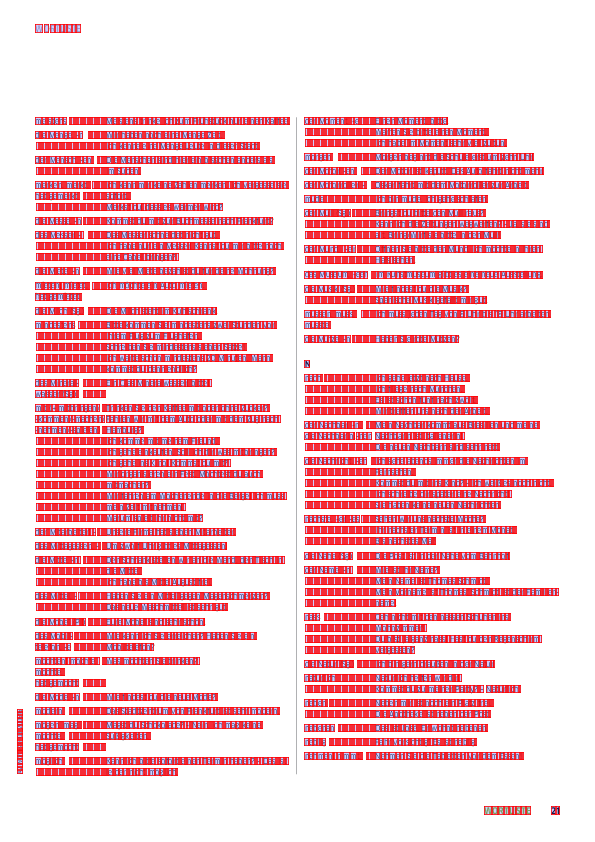

In [3]:
import requests,pdfplumber
from io import BytesIO


pdf = pdfplumber.open('Goethe-Zertifikat_A2_Wortliste.pdf')
page = pdf.pages[20]
text = page.extract_text()
print(text)
pdf.close()
im = page.to_image()
im.reset().draw_rects(page.chars)


In [1]:
from pprint import pprint
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument, PDFNoOutlines
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTPage, LTChar, LTAnno, LAParams, LTTextBox, LTTextLine

class PDFPageDetailedAggregator(PDFPageAggregator):
    def __init__(self, rsrcmgr, pageno=1, laparams=None):
        PDFPageAggregator.__init__(self, rsrcmgr, pageno=pageno, laparams=laparams)
        self.rows = []
        self.page_number = 0
    def receive_layout(self, ltpage):        
        def render(item, page_number):
            if isinstance(item, LTPage) or isinstance(item, LTTextBox):
                for child in item:
                    render(child, page_number)
            elif isinstance(item, LTTextLine):
                child_str = ''
                for child in item:
                    if isinstance(child, (LTChar, LTAnno)):
                        child_str += child.get_text()
                child_str = ' '.join(child_str.split()).strip()
                if child_str:
                    row = (page_number, item.bbox[0], item.bbox[1], item.bbox[2], item.bbox[3], child_str) # bbox == (x1, y1, x2, y2)
                    self.rows.append(row)
                for child in item:
                    render(child, page_number)
            return
        render(ltpage, self.page_number)
        self.page_number += 1
        self.rows = sorted(self.rows, key = lambda x: (x[0], -x[2]))
        self.result = ltpage

fp = open("Goethe-Zertifikat_A2_Wortliste.pdf", 'rb')
parser = PDFParser(fp)
doc = PDFDocument(parser)
#doc.initialize() # leave empty for no password

rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageDetailedAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)

for page in PDFPage.create_pages(doc):
    interpreter.process_page(page)
    # receive the LTPage object for this page
    device.get_result()

pprint(device.rows)

[(0, 52.697, 382.7282, 439.66819999999996, 418.7282, 'GOETHE-ZERTIFIKAT A2'),
 (0, 52.696, 356.2734, 291.1914, 378.2734, 'DEUTSCHPRÜFUNG FÜR'),
 (0,
  52.696,
  334.2734,
  383.19539999999995,
  356.2734,
  'JUGENDLICHE UND ERWACHSENE'),
 (0, 52.697, 247.8804, 166.65040000000002, 269.8804, 'WORTLISTE'),
 (0, 56.556424899999996, 206.388758, 71.2147778, 220.387758, 'A1'),
 (0, 86.3029, 206.388758, 103.493672, 220.387758, 'A2'),
 (0, 118.6856, 206.388758, 165.2140763, 220.387758, 'B1 B2'),
 (0, 181.2097, 206.388758, 194.63199864, 220.387758, 'C1'),
 (0, 211.21775488, 206.388758, 226.68510288000002, 220.387758, 'C2'),
 (0,
  52.6971,
  87.92830000000001,
  122.91779999999997,
  96.92830000000001,
  'Zertifiziert durch'),
 (1, 465.2676, 808.495, 559.8144, 817.495, 'GOETHE-ZERTIFIKAT A2'),
 (1, 142.9532, 716.2009999999999, 190.6784, 725.2009999999999, 'IMPRESSUM'),
 (1,
  142.9532,
  690.2008999999999,
  385.61300000000006,
  699.2008999999999,
  'Diese Deutschprüfung wurde vom Goethe-Instit

  414.28589999999997,
  504.2109000000002,
  '16 = sechzehn'),
 (6,
  89.0367,
  482.2266000000007,
  179.87820000000002,
  491.2266000000007,
  'dienstags, am Dienstag'),
 (6, 358.6119, 482.2113000000002, 415.3659, 491.2113000000002, '17 = siebzehn'),
 (6,
  89.0367,
  469.2270000000007,
  186.6219,
  478.2270000000007,
  'mittwochs, am Mittwoch'),
 (6,
  358.6119,
  469.21170000000023,
  415.9761,
  478.21170000000023,
  '18 = achtzehn'),
 (6,
  89.0367,
  456.2274000000007,
  201.74460000000005,
  465.2274000000007,
  'donnerstags, am Donnerstag'),
 (6,
  358.6119,
  456.21210000000025,
  418.7319,
  465.21210000000025,
  '19 = neunzehn'),
 (6,
  89.0367,
  443.22780000000074,
  165.98940000000002,
  452.22780000000074,
  'freitags, am Freitag'),
 (6,
  358.6119,
  443.21250000000026,
  413.8836,
  452.21250000000026,
  '20 = zwanzig'),
 (6,
  89.0367,
  430.22820000000075,
  177.11700000000005,
  439.22820000000075,
  'samstags, am Samstag'),
 (6,
  358.6119,
  430.2129000000003,
 

  224.24860000000015,
  '(bekommen/ noch nicht. Sie bekommt erst nächste Woche'),
 (9,
  35.6886,
  210.18380000000022,
  258.0333999999999,
  218.18380000000022,
  'die Baustelle, -n Vor unserem Haus ist eine große Baustelle.'),
 (9,
  304.6962,
  205.24860000000015,
  411.1866,
  213.24860000000015,
  'geben/sagen) Bescheid.'),
 (9,
  35.6886,
  196.0654000000002,
  263.9165999999998,
  204.0654000000002,
  'beantworten, Können Sie meine Frage bitte beantworten?'),
 (9,
  305.7226,
  194.24860000000015,
  530.2986,
  202.24860000000015,
  'Kannst du mir bis morgen Bescheid geben?'),
 (9,
  35.6886,
  185.0654000000002,
  238.48299999999995,
  193.0654000000002,
  'beantwortet, Hast du die Mail schon beantwortet?'),
 (9,
  305.7226,
  183.24860000000015,
  529.6497999999999,
  191.24860000000015,
  'Ich frage Herrn Maier und sage Ihnen dann'),
 (9,
  35.6886,
  174.0654000000002,
  106.5558,
  182.0654000000002,
  'hat beantwortet'),
 (9, 305.7226, 172.24860000000015, 408.8586, 180.24

 (12,
  304.1299,
  547.5510000000003,
  361.5219,
  555.5510000000003,
  'ist eingestiegen'),
 (12,
  35.1221,
  544.4326000000003,
  209.03729999999993,
  552.4326000000003,
  'dürfen, darf, Sie dürfen hier nicht parken.'),
 (12,
  35.1221,
  533.4326000000003,
  234.01329999999993,
  541.4326000000003,
  'durfte, Dürfen wir heute länger fernsehen?'),
 (12,
  304.1299,
  533.4326000000003,
  513.8115,
  541.4326000000003,
  'eintragen (sich), Tragen Sie sich bitte in diese Liste ein!'),
 (12,
  35.1221,
  522.4326000000003,
  244.87570000000002,
  530.4326000000003,
  'hat gedurft Darf ich Sie zu einem Kaffee einladen?'),
 (12,
  304.1299,
  522.4326000000003,
  526.3595,
  530.4326000000003,
  'trägt ein, Sie müssen Ihren Namen und Ihre Adresse'),
 (12,
  304.1299,
  511.43260000000026,
  412.48350000000005,
  519.4326000000003,
  'hat eingetragen eintragen.'),
 (12,
  35.1221,
  508.31420000000026,
  282.4301000000001,
  516.3142000000003,
  'der Durst (Sing.) Hast du etwas zu trin

  'Montag ist.'),
 (14,
  35.6892,
  348.24830000000026,
  256.3708,
  356.24830000000026,
  'frei Entschuldigung, ist dieser Platz noch frei?'),
 (14,
  305.72330000000005,
  343.4859000000003,
  463.53130000000004,
  351.4859000000003,
  'Ich finde Lara ganz nett.'),
 (14,
  36.7156,
  337.24830000000026,
  189.94680000000005,
  345.24830000000026,
  'Morgen haben wir frei.'),
 (14,
  305.72330000000005,
  332.4859000000003,
  525.5841,
  340.4859000000003,
  'Oh, ich habe meinen Zahnarzttermin ganz'),
 (14,
  36.7156,
  326.24830000000026,
  147.85880000000003,
  334.24830000000026,
  'Eintritt frei.'),
 (14,
  305.72330000000005,
  321.4859000000003,
  412.94650000000007,
  329.4859000000003,
  'vergessen.'),
 (14,
  35.6892,
  312.12990000000025,
  269.2020000000001,
  320.12990000000025,
  'freiwillig Manchmal bleibe ich freiwillig länger im Büro.'),
 (14,
  304.6969,
  307.3675000000003,
  496.02650000000006,
  315.3675000000003,
  'die Garage, -n Hier ist eine Garage für dein A

  195.89000000000001,
  133.30110000000028,
  'Herein! Die Tür ist offen.'),
 (16, 16.608400000000003, 123.47729999999999, 22.6084, 126.81929999999998, '6'),
 (16, 16.608400000000003, 120.03449999999998, 22.6084, 123.47849999999998, '0'),
 (16, 16.608400000000003, 116.59169999999997, 22.6084, 120.03569999999998, '0'),
 (16,
  36.7156,
  114.30110000000028,
  178.82760000000005,
  122.30110000000028,
  'Woher kommen Sie?'),
 (16,
  304.6969,
  114.30110000000018,
  553.6416999999999,
  122.30110000000018,
  'der Hunger (Sg.) Ich habe Hunger! Wann können wir endlich essen?'),
 (16, 16.608400000000003, 113.14889999999997, 22.6084, 116.59289999999997, '2'),
 (16, 16.608400000000003, 110.75009999999997, 22.6084, 113.15009999999998, '_'),
 (16, 16.608400000000003, 107.30729999999997, 22.6084, 110.75129999999997, '3'),
 (16, 16.608400000000003, 103.98329999999999, 22.6084, 107.42729999999999, '0'),
 (16, 16.608400000000003, 101.58449999999999, 22.6084, 103.9845, '_'),
 (16,
  35.6892,
  100.1

 (19,
  305.7226,
  437.7222000000004,
  519.4578,
  445.7222000000004,
  'Ich habe dir auf die Mailbox gesprochen.'),
 (19,
  35.6886,
  437.7222000000003,
  106.55420000000004,
  445.7222000000003,
  'hat gelegt'),
 (19,
  304.6962,
  423.6038000000004,
  525.2506,
  431.6038000000004,
  'mal / das Mal Sag mal, wie gefällt dir mein neues Kleid?'),
 (19,
  35.6886,
  423.6038000000003,
  255.09500000000006,
  431.6038000000003,
  'leicht Das Paket ist leicht, es wiegt nur ein Kilo.'),
 (19,
  305.7226,
  412.6038000000004,
  553.109,
  420.6038000000004,
  'Das erste Mal war ich vor fünf Jahren in England.'),
 (19,
  36.715,
  412.6038000000003,
  203.3646,
  420.6038000000003,
  'Die Aufgabe ist nicht leicht.'),
 (19,
  305.7226,
  401.6038000000004,
  484.8498,
  409.6038000000004,
  'Tschüss, bis zum nächsten Mal!'),
 (19,
  35.6886,
  398.4854000000003,
  284.023,
  406.4854000000003,
  'leider Leider kann ich nicht kommen. Ich muss zum Arzt.'),
 (19,
  304.6962,
  387.48540000000

  410.9590000000003,
  475.145,
  418.9590000000003,
  'Der Ort liegt in den Bergen.'),
 (21,
  36.715,
  407.8406000000003,
  225.63500000000002,
  415.8406000000003,
  'Es dauert noch ein paar Minuten.'),
 (21,
  305.7226,
  399.9590000000003,
  430.45860000000005,
  407.9590000000003,
  'Wohnort: Köln.'),
 (21,
  36.715,
  396.8406000000003,
  187.5622000000001,
  404.8406000000003,
  'Ich habe noch 20 Euro.'),
 (21,
  35.6886,
  382.72220000000027,
  197.3110000000001,
  390.72220000000027,
  'normal Das ist doch ganz normal.'),
 (21, 304.6962, 371.6670000000003, 309.5682, 379.6670000000003, 'P'),
 (21,
  35.6886,
  368.60380000000026,
  257.98460000000006,
  376.60380000000026,
  'die Note, -n Eva hat immer sehr gute Noten in Deutsch.'),
 (21,
  304.6962,
  357.6046000000003,
  486.3282,
  365.6046000000003,
  'das Paar, -e Romeo und Julia sind ein Paar.'),
 (21,
  35.6886,
  354.48540000000025,
  274.1205999999999,
  362.48540000000025,
  'notieren, notiert, Notieren Sie bitte al

 (23,
  36.148,
  89.18340000000022,
  283.984,
  97.18340000000022,
  'Meine Großmutter ist krank. Sie braucht viel Ruhe.'),
 (23, 16.6079, 88.4955, 22.607899999999997, 90.5835, 't'),
 (23, 16.6079, 86.1267, 22.607899999999997, 88.4967, 'r'),
 (23,
  304.1293,
  86.06580000000025,
  469.5149,
  94.06580000000025,
  'hat geschlafen Haben Sie gut geschlafen?'),
 (23, 16.6079, 82.8399, 22.607899999999997, 86.1279, 'o'),
 (23, 16.6079, 77.49510000000001, 22.607899999999997, 82.84110000000001, 'W'),
 (23, 16.6079, 75.09630000000001, 22.607899999999997, 77.49630000000002, '_'),
 (23,
  305.1557,
  75.06580000000025,
  508.6413000000002,
  83.06580000000025,
  'Gute Nacht! Schlaf gut und träum süß!'),
 (23,
  35.1216,
  75.06500000000023,
  216.49680000000004,
  83.06500000000023,
  'ruhig Ich möchte ein ruhiges Zimmer.'),
 (23, 16.6079, 71.65350000000001, 22.607899999999997, 75.09750000000001, '2'),
 (23, 16.6079, 67.9167, 22.607899999999997, 71.6547, 'A'),
 (23, 35.4048, 26.6999, 45.24, 35

  487.9590000000004,
  219.2776,
  495.9590000000004,
  'der Supermarkt, ¨-e Ich kaufe oft im Supermarkt ein.'),
 (26,
  303.2796,
  481.7222000000004,
  474.39720000000017,
  489.7222000000004,
  'tief Vorsicht, das Wasser ist tief!'),
 (26,
  34.5552,
  473.8406000000004,
  191.65360000000004,
  481.8406000000004,
  'die Suppe, -n Schmeckt dir die Suppe?'),
 (26,
  303.2796,
  467.6038000000004,
  540.5524,
  475.6038000000004,
  'das Tier, -e Wir dürfen keine Tiere in der Wohnung haben.'),
 (26,
  34.5552,
  459.7222000000004,
  215.5919999999999,
  467.7222000000004,
  'surfen, surft, Ich möchte gern surfen lernen.'),
 (26,
  304.30600000000004,
  456.6038000000004,
  490.9852000000001,
  464.6038000000004,
  'Meine Lieblingstiere sind Katzen.'),
 (26,
  34.5552,
  448.7222000000004,
  194.82959999999997,
  456.7222000000004,
  'hat/ist gesurft Surfst du oft im Internet?'),
 (26,
  303.2796,
  442.48540000000037,
  512.2668000000001,
  450.48540000000037,
  'der Tipp, -s Kannst du 

  616.6634,
  275.39040000000006,
  624.6634,
  'die Webseite, -n Es gibt viele Webseiten mit Grammatikübungen.'),
 (29,
  374.9933,
  613.5434,
  515.6925,
  621.5434,
  'Wir hatten im Urlaub schlechtes Wetter.'),
 (29, 35.1216, 602.5434, 71.8896, 610.5434, 'wechseln,'),
 (29,
  105.98800000000001,
  602.5434,
  224.21919999999997,
  610.5434,
  'Wir müssen den Reifen wechseln.'),
 (29, 304.12929999999994, 599.4234, 331.98369999999994, 607.4234, 'wichtig'),
 (29,
  374.9933,
  599.4234,
  509.65489999999994,
  607.4234,
  'Es ist wichtig, dass Sie auch kommen.'),
 (29, 35.1216, 591.5434, 70.2416, 599.5434, 'wechselt,'),
 (29,
  105.988,
  591.5434,
  241.33199999999994,
  599.5434,
  'Können Sie mir zehn Dollar wechseln?'),
 (29,
  374.9933,
  588.4234,
  520.8317,
  596.4234,
  'Morgen habe ich einen wichtigen Termin.'),
 (29, 35.1216, 580.5434, 88.04960000000001, 588.5434, 'hat gewechselt'),
 (29, 304.12929999999994, 574.3034, 316.71329999999995, 582.3034, 'wie'),
 (29, 374.9933, 57

In [162]:
import pandas as pd

In [163]:
DF = pd.DataFrame(device.rows)

In [165]:
DF.describe()

,0,1,2,3,4
count,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000
mean,54.943531,234.014923,400.169234,315.090135,408.071124
std,27.041646,153.071893,214.236195,167.154130,214.534351
min,0.000000,16.635400,26.644700,22.635400,35.644700
25%,32.000000,131.638100,221.346400,174.790100,229.346400
50%,55.000000,141.566100,397.409300,278.198100,408.174200
75%,78.000000,411.141300,584.346400,471.493600,592.346400
max,103.000000,560.522100,839.381000,566.522100,848.381000


In [166]:
DF.columns = ["page","xmin","ymin","xmax","ymax","text"]

<AxesSubplot:>

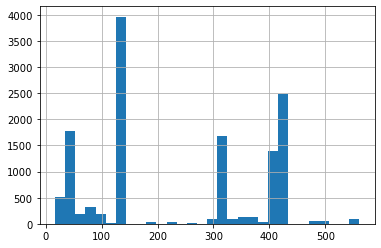

In [168]:
DF.xmin.hist(bins = 30)

In [173]:
DF[DF["page"]==30]

,page,xmin,ymin,xmax,ymax,text
2969,30,35.1491,808.5028,80.3417,817.5028,WORTLISTE
2970,30,35.1496,749.3464,80.8328,757.3464,"das Detail, -s"
2971,30,131.6456,749.3464,236.6536,757.3464,1. Dieses Detail ist unwichtig.
2972,30,314.6456,749.3464,393.6584,757.3464,"diskutieren, diskutiert,"
2973,30,421.0616,749.3464,559.9736,757.3464,"Wir haben lange diskutiert, wie wir das"
...,...,...,...,...,...,...
3107,30,16.6354,41.0038,22.6354,43.4038,_
3108,30,16.6354,37.9702,22.6354,41.0062,S
3109,30,16.6354,34.3786,22.6354,38.0446,V
3110,30,485.2931,26.6458,531.9131,35.6458,WORTLISTE


In [175]:
DF[DF["text"]=="3"]

,page,xmin,ymin,xmax,ymax,text
105,2,17.0854,46.8526,23.0854,50.2966,3
111,2,555.1881,26.6488,560.2461,35.6488,3
145,4,47.9658,46.8526,53.9658,50.2966,3
182,5,17.0858,46.8526,23.0858,50.2966,3
221,6,17.0854,46.8526,23.0854,50.2966,3
...,...,...,...,...,...,...
12908,98,17.0854,46.8454,23.0854,50.2894,3
13053,99,17.0858,48.4356,23.0858,51.8796,3
13193,100,17.0854,46.8454,23.0854,50.2894,3
13264,101,17.0858,48.4356,23.0858,51.8796,3


In [238]:
DF[DF["text"].isin(["die Zeit", "4. Um diese Zeit ist hier wenig los.","die Zigarette, -n","e","zusammenfassen,","3. Das macht zusammen 10 Euro 80."])]

,page,xmin,ymin,xmax,ymax,text
12951,99,35.1501,573.3464,61.9021,581.3464,die Zeit
12954,99,314.6461,573.3464,370.9789,581.3464,"die Zigarette, -n"
12964,99,131.6461,518.3464,254.9101,526.3464,4. Um diese Zeit ist hier wenig los.
12970,99,124.5581,485.3464,128.6941,493.3464,e
13124,100,411.1416,430.3464,539.7800,438.3464,3. Das macht zusammen 10 Euro 80.
13140,100,346.3736,353.3464,410.5176,361.3464,"zusammenfassen,"
13282,103,560.0721,657.8240,566.0721,660.9260,e
13296,103,559.8321,612.4480,565.8321,615.5500,e
13312,103,559.8321,557.6380,565.8321,560.7400,e


In [199]:
alphw = DF[(DF["page"]>14)&(DF["page"]<102)]

In [200]:
alphw[alphw["text"]=="ZERTIFIKAT B1"]["ymin"].describe()

count     44.0000
mean     808.4398
std        0.0000
min      808.4398
25%      808.4398
50%      808.4398
75%      808.4398
max      808.4398
Name: ymin, dtype: float64

In [201]:
alphw[alphw["ymin"]>807]["text"].value_counts()

ZERTIFIKAT B1    44
WORTLISTE        43
Name: text, dtype: int64

In [202]:
alphw[alphw["text"]=="3"]["ymin"].describe()

count    87.000000
mean     47.649639
std       0.799656
min      46.845400
25%      46.845400
50%      48.435600
75%      48.435600
max      48.435600
Name: ymin, dtype: float64

In [203]:
alphw[alphw["ymin"]<48.44]["text"].value_counts()[:6]

V            87
_            87
S            87
3            87
0            87
WORTLISTE    85
Name: text, dtype: int64

In [204]:
alphw[alphw["ymin"]<48.44]["text"].unique()[6:]

array(['WORTLISTE', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91',
       '92', '93', '94', '95', '96', '97', '98', '99', '100 WORTLISTE',
       '101', '102 WORTLISTE'], dtype=object)

In [205]:
alphw=alphw[(alphw["ymin"]>48.44)&(alphw["ymin"]<807)]

In [209]:
alphw[alphw["text"].apply(lambda x: "Der Zugang zu diesem Haus ist" in x)]

,page,xmin,ymin,xmax,ymax,text
13104,100,131.6456,529.3464,252.7368,537.3464,1. Der Zugang zu diesem Haus ist


In [214]:
alphw[alphw["text"].apply(lambda x: "Am Sonntag sind die" in x)]

,page,xmin,ymin,xmax,ymax,text
13202,101,131.6461,749.3464,259.3821,757.3464,1. Am Sonntag sind die die meisten


In [215]:
alphw[alphw["text"].apply(lambda x: "e"==x)]

,page,xmin,ymin,xmax,ymax,text
12970,99,124.5581,485.3464,128.6941,493.3464,e


In [216]:
alphw[alphw["text"].apply(lambda x: "-e"==x)]

,page,xmin,ymin,xmax,ymax,text
12305,94,401.0616,298.3464,408.1896,306.3464,-e


In [210]:
alphw[alphw["text"].apply(lambda x: "Bitte eine Fahrkarte nach Frankfu" in x)]

,page,xmin,ymin,xmax,ymax,text
13096,100,411.1416,584.3464,545.9096,592.3464,1. Bitte eine Fahrkarte nach Frankfurt


In [211]:
alphw[alphw["text"].apply(lambda x: "zurück/zurück" in x)]

,page,xmin,ymin,xmax,ymax,text
13095,100,314.6456,584.3464,367.5016,592.3464,zurück/zurück-


In [231]:
alphw[alphw["text"].apply(lambda x: "die Aufnahme, -n" in x)]

,page,xmin,ymin,xmax,ymax,text,column
1492,19,347.5821,78.3464,410.5181,86.3464,"die Aufnahme, -n",2


In [232]:
alphw[alphw["text"].apply(lambda x: "aufnehmen, nimmt" in x)]

,page,xmin,ymin,xmax,ymax,text,column
1480,19,314.6461,133.3464,396.0861,141.3464,"aufnehmen, nimmt auf,",2


In [ ]:
alphw[alphw["text"].apply(lambda x: "der Zugang, ¨-e" in x)]

In [239]:
def columntranslation(x):
    if x<129:
        return 1
    if x<300:
        return 2
    if x<410.5:
        return 3
    return 4

In [240]:
alphw["column"]=alphw["xmin"].apply(columntranslation)

In [226]:
alphw[(alphw["column"]==1)&(alphw["xmax"]>190)]["text"].iloc[0]

'Alphabetischer Wortschatz'

In [230]:
alphw[(alphw["column"]==2)&(alphw["xmax"]>410)]#["text"].iloc[0]

,page,xmin,ymin,xmax,ymax,text,column
1492,19,347.5821,78.3464,410.5181,86.3464,"die Aufnahme, -n",2
2067,23,338.4301,155.3464,410.5149,163.3464,"bekannt geben, gibt",2
2223,24,331.8696,144.3464,410.5088,152.3464,"die Beschreibung, -en",2
2573,27,315.4461,639.1304,410.4301,648.5544,"→CH:dieBriefträgerin,-nen",2
4756,42,332.7256,617.3464,415.1736,625.3464,"das Gasthaus, ¨-er (A)",2
4762,42,336.0456,584.3464,412.8384,592.3464,"die Gaststätte, -n (D)",2
5653,48,336.9253,375.3464,410.5253,383.3464,"heraus, fand heraus,",2
5705,48,333.3173,100.3464,410.5253,108.3464,"(herunter-)laden, lädt",2
5709,48,329.0773,89.3464,410.5253,97.3464,"herunter, lud herunter,",2
6336,53,339.3031,430.3464,410.5191,438.3464,"kennenlernen, lernt",2


In [241]:
alphw[alphw["text"]!='Alphabetischer Wortschatz'].groupby("column")[["xmin","xmax"]].describe()

xmin                                                                 \
         count        mean        std       min       25%       50%       75%   
column                                                                          
1       2029.0   43.067672  17.501649   35.1489   35.1496   35.1501   35.1511   
2       3896.0  138.070146   4.763821  131.6341  131.6449  141.5581  141.5626   
3       2010.0  322.091144  17.246320  314.6449  314.6456  314.6461  314.6464   
4       3881.0  417.490145   4.761561  411.1330  411.1417  421.0536  421.0616   

                    xmax                                               \
             max   count        mean        std       min         25%   
column                                                                  
1       124.5581  2029.0   97.121178  25.931624   38.5600   77.229400   
2       167.6456  3896.0  234.426392  41.464083  136.8173  199.549600   
3       401.0616  2010.0  376.701648  24.628443  320.1131  358.127975   
4       421.0696  3881.0  513.411650  41.241697  416.3160  478.110100   

                                         
              50%         75%       max  
column                                   
1        97.98160  124.229600  133.3504  
2       253.10225  268.379025  282.7226  
3       376.53385  400.354000  415.1736  
4       530.94720  547.149600  564.6456

In [243]:
alphw[(alphw["column"]==1)&(alphw["xmax"]>131.63)]#["text"].iloc[0]

,page,xmin,ymin,xmax,ymax,text,column
761,15,59.7820,769.0700,195.3240,780.0700,Alphabetischer Wortschatz,1
8306,67,47.6144,592.9854,133.3504,600.9854,CH: Serviceangestellter,1
8638,69,87.0061,386.3464,133.3501,394.3464,CH: Rentner,1


In [245]:
"1".isdigit()

True

In [247]:
alphw[(alphw["column"]==2)&(alphw["xmin"]<133.35)]["text"].apply(lambda x: x[0].isdigit()).value_counts()#["text"].iloc[0]

True     1371
False       3
Name: text, dtype: int64

In [248]:
aux=alphw[(alphw["column"]==2)&(alphw["xmin"]<133.35)]["text"]
aux[aux.apply(lambda x: x[0].isdigit()==False)]#.value_counts()

2871      Ich danke dir für die Einladung.
3354     Möchtest du zum Frühstück ein Ei?
12003          Ich vermisse meine Familie.
Name: text, dtype: object

In [249]:
alphw[(alphw["column"]==3)&(alphw["xmax"]>411.1)]

,page,xmin,ymin,xmax,ymax,text,column
4756,42,332.7256,617.3464,415.1736,625.3464,"das Gasthaus, ¨-er (A)",3
4762,42,336.0456,584.3464,412.8384,592.3464,"die Gaststätte, -n (D)",3


In [251]:
#aux=alphw[(alphw["column"]==2)&(alphw["xmin"]<133.35)]["text"]
#aux[aux.apply(lambda x: x[0].isdigit()==False)]#.value_counts()

aux = alphw[(alphw["column"]==4)&(alphw["xmin"]<415.17)]["text"]
aux[aux.apply(lambda x: x[0].isdigit()==False)]

853      Lasst uns über diesen Punkt abstimmen.
1286               Schmecken dir die Aprikosen?
1583      Füllen Sie bitte dieses Formular aus!
1811                            Zahlen Sie bar?
1816                Ich habe kein Bargeld mehr.
1819               John trägt jetzt einen Bart.
11616         Hast du eine Vase für die Blumen?
Name: text, dtype: object

<AxesSubplot:>

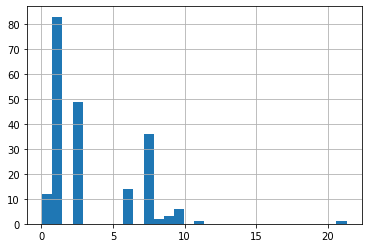

In [280]:
diff = alphw.sort_values("ymax")["ymax"].diff()
diff[diff>0.001].hist(bins = 30)

In [261]:
DF["ymax"].max()

848.3810000000002

In [268]:
alphw["yaux"]=850-alphw["ymax"]+850*(alphw["column"]>2.5)

In [269]:
alphw["columnaux"]=1-alphw["column"].isin([1,3])

In [320]:
alphw["yaux"].max()

1624.6545999999998

In [382]:
alphw["yabs"] = (alphw["yaux"]+alphw["page"].apply(int)*2000-30000).apply(lambda x: int(round(x,0)*10))#(entries["yaux"].diff()>12.43).cumsum()

In [329]:
alphw[alphw["text"].apply(len)==2]["text"]

769      ab
991      1.
1017     an
1057     1.
1149     1.
         ..
13006    1.
13012    zu
13015    1.
13152    1.
13228    1.
Name: text, Length: 278, dtype: object

In [415]:
entries = alphw[alphw["columnaux"]==0]

In [416]:
entries = entries.sort_values(["page","yabs"])

In [417]:
entries["dy"] = entries["yabs"].diff()

In [418]:
entries["groupaux"] = (entries["dy"]>130.5).cumsum()

In [419]:
limits = entries.groupby("groupaux").yabs.min()-40#.to_dict()

In [420]:
def assignblock(x,limits):
    return sum(x>=limits)

In [421]:
alphw["block"] = alphw["yabs"].apply(lambda x: assignblock(x,limits))

In [422]:
alphw

,page,xmin,ymin,xmax,ymax,text,column,yaux,columnaux,yabs,block
760,15,35.1500,769.1326,44.0160,780.1326,2,1,69.8674,0,700,1
761,15,59.7820,769.0700,195.3240,780.0700,Alphabetischer Wortschatz,1,69.9300,0,700,1
764,15,35.1504,746.4554,42.4764,757.4554,A,1,92.5446,0,930,2
769,15,35.1504,724.9854,43.7744,732.9854,ab,1,117.0146,0,1170,3
783,15,35.1504,658.9854,104.1504,666.9854,"abbiegen, biegt ab,",1,183.0146,0,1830,4
...,...,...,...,...,...,...,...,...,...,...,...
13249,101,421.0621,529.3464,481.0781,537.3464,beiden Schränke.,4,1162.6536,1,1731630,2894
13250,101,411.1421,518.3464,547.5741,526.3464,2. Heidelberg liegt zwischen Frankfurt,4,1173.6536,1,1731740,2894
13253,101,421.0621,507.3464,469.1277,515.3464,und Stuttgart.,4,1184.6536,1,1731850,2894
13255,101,411.1421,496.3464,541.0781,504.3464,3. Zwischen 8 und 10 Uhr bin ich zu,4,1195.6536,1,1731960,2894


In [423]:
def addspace(x):
    output = x.iloc[0]
    for i in range(1,len(x)):
        xi = x.iloc[i]
        if len(output)>=2:
            if (output[-1]=="-") & (output[-2].isalpha()):
                output=output[:-1]+xi
        output+=" "+xi
            
    return output

In [424]:
alphw = alphw.sort_values(["columnaux","yabs","xmin"])#.reset_index(drop=True)
final = alphw.groupby(["columnaux","block"]).agg({"text":addspace}).reset_index(drop=False)

In [425]:
entries  = final[final["columnaux"]==0]
examples = final[final["columnaux"]==1]
ff = pd.merge(entries, examples, on="block")

In [363]:
pd.options.display.max_rows= 300

In [368]:
997.7-985.2

12.5

In [395]:
alphw.sort_values("yabs")

,page,xmin,ymin,xmax,ymax,text,column,yaux,columnaux,yabs,block
760,15,35.1500,769.1326,44.0160,780.1326,2,1,69.8674,0,700,1
761,15,59.7820,769.0700,195.3240,780.0700,Alphabetischer Wortschatz,1,69.9300,0,700,1
764,15,35.1504,746.4554,42.4764,757.4554,A,1,92.5446,0,930,2
768,15,131.6464,727.3454,243.6064,735.3454,1. Die Fahrt kostet ab Hamburg,2,114.6546,1,1150,2
769,15,35.1504,724.9854,43.7744,732.9854,ab,1,117.0146,0,1170,3
...,...,...,...,...,...,...,...,...,...,...,...
13249,101,421.0621,529.3464,481.0781,537.3464,beiden Schränke.,4,1162.6536,1,1731630,2998
13250,101,411.1421,518.3464,547.5741,526.3464,2. Heidelberg liegt zwischen Frankfurt,4,1173.6536,1,1731740,2998
13253,101,421.0621,507.3464,469.1277,515.3464,und Stuttgart.,4,1184.6536,1,1731850,2998
13255,101,411.1421,496.3464,541.0781,504.3464,3. Zwischen 8 und 10 Uhr bin ich zu,4,1195.6536,1,1731960,2998


In [408]:
entries

,columnaux,block,text
0,0,1,2 Alphabetischer Wortschatz
1,0,2,A
2,0,3,ab
3,0,4,"abbiegen, biegt ab, bog ab, ist abgebogen"
4,0,5,"die Abbildung, -en"
...,...,...,...
2993,0,2994,"zweifeln, zweifelt, zweifelte, hat gezweifelt"
2994,0,2995,"der Zweifel, -"
2995,0,2996,"die Zwiebel, -n"
2996,0,2997,"(sich) zwingen, zwingt, zwang, hat gezwungen"


In [426]:
entries[entries["block"].apply(lambda x: x not in ff["block"].unique())]

,columnaux,block,text
0,0,1,2 Alphabetischer Wortschatz
1,0,2,A
229,0,230,B
457,0,458,C
468,0,469,D
563,0,564,E
751,0,752,F
910,0,911,G
1061,0,1062,H
1174,0,1175,I


In [427]:
ff

,columnaux_x,block,text_x,columnaux_y,text_y
0,0,3,ab,1,1. Die Fahrt kostet ab Hamburg 200 Euro. 2. Ab...
1,0,4,"abbiegen, biegt ab, bog ab, ist abgebogen",1,An der nächsten Kreuzung müssen Sie links abbi...
2,0,5,"die Abbildung, -en",1,"Auf der Abbildung sehen Sie, wie man das Gerät..."
3,0,6,"das Abenteuer, -",1,1. Unser Urlaub war ein tolles Abenteuer. 2. D...
4,0,7,aber,1,"1. Heute kann ich nicht, aber morgen ganz best..."
...,...,...,...,...,...
2864,0,2890,"zweifeln, zweifelt, zweifelte, hat gezweifelt",1,"Ich zweifle nicht daran, dass Sie recht haben."
2865,0,2891,"der Zweifel, -",1,1. Da ist ohne Zweifel die beste Lösung. 2. Al...
2866,0,2892,"die Zwiebel, -n",1,Eine Zwiebel in kleine Stücke schneiden und zu...
2867,0,2893,"(sich) zwingen, zwingt, zwang, hat gezwungen",1,1. Bitte zwing mich nicht etwas zu essen. Ich ...


In [293]:
entries["finalcomma"] = entries["text"].apply(lambda x: x[-1]==",").shift()

In [298]:
entries["dyabs"] = entries["dy"].apply(abs)
entries.groupby("finalcomma")["dyabs"].describe(percentiles= [0.01,0.1])

,count,mean,std,min,1%,10%,50%,max
finalcomma,,,,,,,,
False,3261.0,76.907324,237.216957,0.0626,10.51680,12.424,33.0,1533.424
True,778.0,11.002108,0.208877,9.5760,10.72216,11.000,11.0,12.424


In [316]:
"ñ".isalpha()

True

In [318]:
entries["page"] = entries["page"].apply(int)

In [319]:
entries

,page,xmin,ymin,xmax,ymax,text,column,yaux,columnaux,dy,groupaux,finalcomma,dyabs
760,15,35.1500,769.1326,44.0160,780.1326,2,1,69.8674,0,NaN,0,NaN,NaN
761,15,59.7820,769.0700,195.3240,780.0700,Alphabetischer Wortschatz,1,69.9300,0,0.0626,0,False,0.0626
764,15,35.1504,746.4554,42.4764,757.4554,A,1,92.5446,0,22.6146,1,False,22.6146
769,15,35.1504,724.9854,43.7744,732.9854,ab,1,117.0146,0,24.4700,2,False,24.4700
783,15,35.1504,658.9854,104.1504,666.9854,"abbiegen, biegt ab,",1,183.0146,0,66.0000,3,False,66.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13218,101,314.6461,672.3464,361.7661,680.3464,"der Zweifel, -",3,1019.6536,0,22.0000,2804,False,22.0000
13224,101,314.6461,639.3464,367.0541,647.3464,"die Zwiebel, -n",3,1052.6536,0,33.0000,2805,False,33.0000
13235,101,314.6461,595.3464,394.4461,603.3464,"(sich) zwingen, zwingt,",3,1096.6536,0,44.0000,2806,False,44.0000
13237,101,314.6461,584.3464,394.7637,592.3464,"zwang, hat gezwungen",3,1107.6536,0,11.0000,2806,True,11.0000


In [310]:
finalentries = entries.groupby("groupaux").agg({"text":addspace,"xmin":"min","yaux":"min","column":"mean","page":"mean"})

In [312]:
finalentries["text"].to_list()

['2 Alphabetischer Wortschatz',
 'A',
 'ab',
 'abbiegen, biegt ab, bog ab, ist abgebogen',
 'die Abbildung, -en',
 'das Abenteuer, -',
 'aber',
 'abfahren, fährt ab, fuhr ab, ist abgefahren',
 'die Abfahrt, -en',
 'der Abfall, ¨-e',
 'der Abfalleimer, -',
 'Abgase (Pl.)',
 'abgeben, gibt ab, gab ab, hat abgegeben',
 'abhängen, hängt ab, hing ab, hat abgehangen (von)',
 'abhängig',
 'abheben, hebt ab, hob ab, hat abgehoben',
 'abholen, holt ab, holte ab, hat abgeholt',
 'abschreiben, schreibt ab, schrieb ab, hat abgeschrieben',
 'das Abitur (D)→A, CH: Matura',
 'ablehnen, lehnt ab, lehnte ab, hat abgelehnt',
 'abmachen, macht ab, machte ab, hat abgemacht',
 'abnehmen, nimmt ab, nahm ab, hat abgenommen',
 'abonnieren, abonniert, abonnierte, hat abonniert',
 'das Abonnement, -s/-e',
 'absagen, sagt ab, sagte ab, hat abgesagt',
 'der Abschluss, ¨-e',
 'der Abschnitt, -e',
 'der Absender, - die Absenderin, -nen',
 'die Absicht, -en',
 'absolut',
 'abstimmen, stimmt ab, stimmte ab, hat abges

In [294]:
entries.head(20)

,page,xmin,ymin,xmax,ymax,text,column,yaux,columnaux,dy,groupaux,finalcomma
760,15,35.1500,769.1326,44.0160,780.1326,2,1,69.8674,0,NaN,0,NaN
761,15,59.7820,769.0700,195.3240,780.0700,Alphabetischer Wortschatz,1,69.9300,0,0.0626,0,False
764,15,35.1504,746.4554,42.4764,757.4554,A,1,92.5446,0,22.6146,1,False
769,15,35.1504,724.9854,43.7744,732.9854,ab,1,117.0146,0,24.4700,2,False
783,15,35.1504,658.9854,104.1504,666.9854,"abbiegen, biegt ab,",1,183.0146,0,66.0000,3,False
785,15,35.1504,647.9854,112.2304,655.9854,"bog ab, ist abgebogen",1,194.0146,0,11.0000,4,True
791,15,35.1504,625.9854,99.7744,633.9854,"die Abbildung, -en",1,216.0146,0,22.0000,5,False
798,15,35.1504,592.9854,92.6544,600.9854,"das Abenteuer, -",1,249.0146,0,33.0000,6,False
808,15,35.1504,548.9854,51.0704,556.9854,aber,1,293.0146,0,44.0000,7,False
837,15,35.1504,394.9854,102.9720,402.9854,"abfahren, fährt ab,",1,447.0146,0,154.0000,8,False


In [263]:
alphw.sort_values(["page","column","yaux","xmin"])

,page,xmin,ymin,xmax,ymax,text,column,yaux
760,15,35.1500,769.1326,44.0160,780.1326,2,1,69.8674
761,15,59.7820,769.0700,195.3240,780.0700,Alphabetischer Wortschatz,1,69.9300
764,15,35.1504,746.4554,42.4764,757.4554,A,1,92.5446
769,15,35.1504,724.9854,43.7744,732.9854,ab,1,117.0146
783,15,35.1504,658.9854,104.1504,666.9854,"abbiegen, biegt ab,",1,183.0146
...,...,...,...,...,...,...,...,...
13249,101,421.0621,529.3464,481.0781,537.3464,beiden Schränke.,4,312.6536
13250,101,411.1421,518.3464,547.5741,526.3464,2. Heidelberg liegt zwischen Frankfurt,4,323.6536
13253,101,421.0621,507.3464,469.1277,515.3464,und Stuttgart.,4,334.6536
13255,101,411.1421,496.3464,541.0781,504.3464,3. Zwischen 8 und 10 Uhr bin ich zu,4,345.6536


In [ ]:
zufrieden

In [206]:
"Bitte eine Fahrkarte nach Frankfu"

,page,xmin,ymin,xmax,ymax,text
760,15,35.1500,769.1326,44.0160,780.1326,2
761,15,59.7820,769.0700,195.3240,780.0700,Alphabetischer Wortschatz
762,15,314.6461,749.3464,402.3245,757.3464,"abschreiben, schreibt ab,"
763,15,421.0624,749.3454,537.7944,757.3454,Er hat die Hausaufgaben von mir
764,15,35.1504,746.4554,42.4764,757.4554,A
...,...,...,...,...,...,...
13259,101,35.1501,474.3464,126.3101,483.7704,(CH) → D: Imbiss; A: Jause
13260,101,35.1501,452.3464,52.3661,460.3464,zwar
13261,101,131.6461,452.3464,280.3549,460.3464,"1. Diese Schuhe sind zwar teuer, aber gut."
13262,101,131.6461,441.3464,259.1981,449.3464,2. Ich kriege jetzt doch eine Woche


In [170]:
DF[DF["text"].duplicated(keep=False)].sort_values("text")

,page,xmin,ymin,xmax,ymax,text
454,10,93.9248,572.6435,366.2378,581.6435,(4) genügend (der/ein Vierer)
458,10,93.9248,494.6585,366.2378,503.6585,(4) genügend (der/ein Vierer)
9643,76,35.1496,441.3464,87.2536,449.3464,(Schlag-)Rahm
8315,67,35.1504,548.9854,84.9264,556.9854,(Schlag-)Rahm
9372,74,314.6456,320.3464,364.4216,328.3464,(Schlag-)Rahm
...,...,...,...,...,...,...
9919,78,421.0536,496.3464,465.7656,504.3464,übermorgen.
12537,96,141.5570,518.3464,180.9090,526.3464,„männlich“.
7507,61,141.5626,364.3464,180.9146,372.3464,„männlich“.
9642,76,35.1496,452.1304,120.5096,461.5544,→ D: (Schlag-)Sahne; CH:


In [ ]:
(76, 372.7496, 243.3464, 408.1896, 251.3464, 'schmutzig'),
(76,
  411.1336,
  243.3464,
  558.704,
  251.3464,
  '1. Leg bitte die schmutzige Wäsche in die'),

(76,
  141.5576,
  419.34639999999996,
  274.72560000000004,
  427.34639999999996,
  'Auf der Post gibt es immer eine lange'),
(76,
  314.6456,
  419.34639999999996,
  369.3816,
  427.34639999999996,
  'hat geschmeckt'),

(76,
  411.1336,
  386.34639999999996,
  551.788,
  394.34639999999996,
  '2. Ich kann vor Schmerzen nicht laufen.'),

(76,
  421.0536,
  364.34639999999996,
  531.7536,
  372.34639999999996,
  'Sie haben Zahnschmerzen? Ich'),

WORTLISTE
5. In den Bergen liegt schon Schnee. die Lösung, -en 1. Wir fahren alle zusammen mit dem
Zug. Das ist die beste Lösung.
der Lift, -e →D, A: Aufzug Im Büro ist leider der Lift kaputt. 2. Die Aufgabe ist nicht schwer. Die 
Lösung ist ganz einfach.
die Limonade, -n Die Limonade ist sehr süß. 
die Luft 1. Oh, hier ist aber schlechte Luft.
die Linie, -n Zum Hauptbahnhof können Sie mit der 2. Die Seeluft tut mir gut.
Linie 8 fahren. 3. Bitte mach das Fenster auf. Ich 
brauche frische Luft.
links 1. An der Kreuzung müssen Sie nach links
abbiegen. lügen, lügt, log,  1. Du sollst nicht lügen.
2. Gehen Sie die nächste Straße links. hat gelogen 2. Glaube nicht alles, was man dir sagt. Es
ist oft gelogen.
link- 1. Er hat sich das linke Bein gebrochen.
2. Das Haus ist auf der linken Seite. die Lüge, -n Das ist eine Lüge!
die Lippe, -n Es ist sehr kalt. Meine Lippen sind die Lust 1. Ich habe keine Lust zu grillen.
ganz trocken. 2. Hast du Lust auf einen Tee?
die Liste, -n Was brauchen wir 

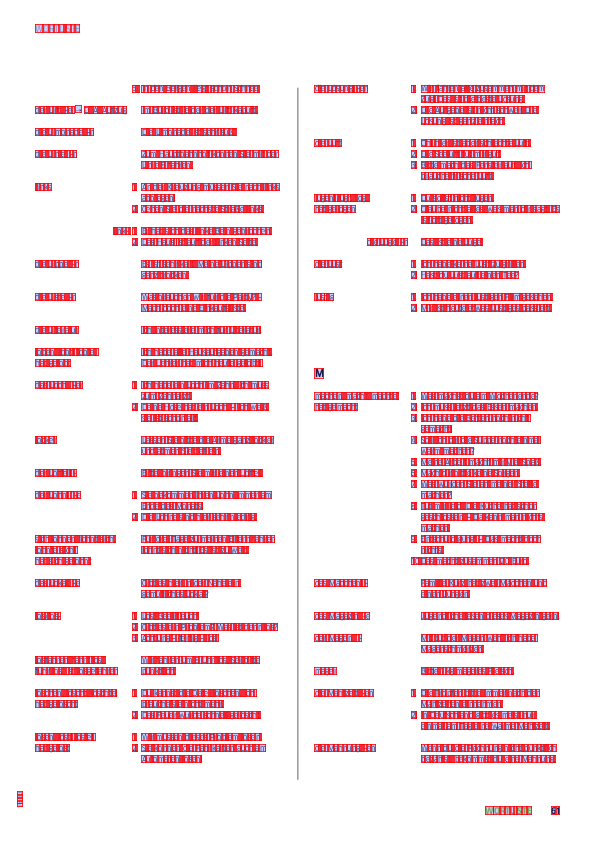

In [145]:
    
import requests, pdfplumber
from io import BytesIO
url = 'https://www.goethe.de/pro/relaunch/prf/de/Goethe-Zertifikat_B1_Wortliste.pdf'
rq = requests.get(url)
pdf = pdfplumber.open(BytesIO(rq.content))
page = pdf.pages[60]
im = page.to_image()

txt = page.extract_text()
print(txt)
im.reset().draw_rects(page.chars)


In [141]:
!pip install wand==0.4.4

  Created wheel for wand: filename=Wand-0.4.4-py3-none-any.whl size=69936 sha256=0ef8ec419896bbca0ecf948c3c4467d2a87d8e559e9798f00f0b674a137459f3
  Stored in directory: c:\users\pablo\appdata\local\pip\cache\wheels\1b\f6\e7\23c51a39e4b654f6b9ede20fb3854df8347864341360c27625
Successfully built wand
  Attempting uninstall: wand
    Found existing installation: Wand 0.6.6
    Uninstalling Wand-0.6.6:
      Successfully uninstalled Wand-0.6.6


In [147]:
!pip install pdf_layout_scanner

In [152]:
toc

[]

In [153]:
from pdf_layout_scanner import layout_scanner
toc = layout_scanner.get_pages('Goethe-Zertifikat_B1_Wortliste.pdf')
print(pages[0])


2021-03-06 11:16:25 pdf_layout_scanner.layout_scanner[ERROR] failed to save image on page1 <LTImage(Im0) 297.245,35.374,430.284,97.716 (369, 173)>
2021-03-06 11:16:25 pdf_layout_scanner.layout_scanner[ERROR] failed to save image on page1 <LTImage(Im1) 213.067,40.872,269.707,97.512 (157, 157)>
2021-03-06 11:16:25 pdf_layout_scanner.layout_scanner[ERROR] failed to save image on page1 <LTImage(Im2) 52.724,39.686,171.874,96.378 (330, 157)>
2021-03-06 11:16:26 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:26 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 449.6089000000002 -> 464.00890000000015
2021-03-06 11:16:26 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 320.0089000000002 -> 348.8089000000002
2021-03-06 11:16:26 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 219.20890000000017 -> 248.00890000000018
2021-03-06 11:16:26 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 420.80920000000003 -> 680.008

2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 240.3464 -> 339.34639999999996
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (9, 7)
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 295.34639999999996 -> 339.34639999999996
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (7, 7)
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 251.3464 -> 306.34639999999996
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (3, 7)
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 196.3464 -> 306.34639999999996
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (8, 7)
2021-03-06 11:16:31 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 284.3463999

2021-03-06 11:16:32 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 86.34639999999999 -> 603.3464
2021-03-06 11:16:32 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (6, 7)
2021-03-06 11:16:32 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 427.34639999999996 -> 603.3464
2021-03-06 11:16:32 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (5, 7)
2021-03-06 11:16:32 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 405.34639999999996 -> 581.3464
2021-03-06 11:16:32 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:32 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 383.34639999999996 -> 559.3464
2021-03-06 11:16:33 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:33 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 548.3464 -> 817.5028
2021-03-06 11:16:33 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2

2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 317.34639999999996 -> 328.34639999999996
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 669.3464 -> 724.3464
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 504.34639999999996 -> 526.3464
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 306.34639999999996 -> 361.34639999999996
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 130.3464 -> 273.34639999999996
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (5, 7)
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 196.3464 -> 229.3464
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:37 pdf_layout_scanner.layout_scanner[INFO] M

2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (3, 7)
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 680.3464 -> 735.3464
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 658.3464 -> 713.3464
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 625.3464 -> 746.3464
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 713.3464 -> 724.3464
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 625.3464 -> 702.3464
2021-03-06 11:16:40 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 713.3464 -> 757.3464
2021-03-06 11:16:40 pdf_layout

2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (6, 7)
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 240.3464 -> 262.34639999999996
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 229.3464 -> 262.34639999999996
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 724.3464 -> 735.3464
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 152.3464 -> 218.3464
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 570.3464 -> 581.3464
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (3, 7)
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 658.3464 -> 757.3464
2021-03-06 11:16:43 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06

2021-03-06 11:16:45 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 339.34639999999996 -> 438.34639999999996
2021-03-06 11:16:45 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 537.3464 -> 548.3464
2021-03-06 11:16:45 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 306.34639999999996 -> 317.34639999999996
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 130.3464 -> 185.3464
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (3, 7)
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 141.3464 -> 185.3464
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 141.3464 -> 185.3464
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 1

2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 328.34639999999996 -> 757.3464
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (13, 7)
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 724.3464 -> 757.3464
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (14, 7)
2021-03-06 11:16:46 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 647.3464 -> 757.3464
2021-03-06 11:16:47 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 614.3464 -> 658.3464
2021-03-06 11:16:47 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 647.3464 -> 658.3464
2021-03-06 11:16:47 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 581.3464 -> 592.3464
2021-03-06 11:16:47 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 504.34639999999996 -> 570.3464
2021-03-06 11:16:47 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (9, 7

2021-03-06 11:16:49 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 372.34639999999996 -> 416.34639999999996
2021-03-06 11:16:49 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (8, 7)
2021-03-06 11:16:49 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 372.34639999999996 -> 416.34639999999996
2021-03-06 11:16:49 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:49 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 339.34639999999996 -> 394.34639999999996
2021-03-06 11:16:49 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (6, 7)
2021-03-06 11:16:49 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 284.34639999999996 -> 317.34639999999996
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 405.34639999999996 -> 471.34639999999996
2021-03-06 11:16:50 pdf_layout_

2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (5, 7)
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 262.3454 -> 724.3454
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (3, 7)
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 229.3454 -> 713.3454
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 196.3454 -> 691.3454
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 229.3464 -> 702.3454
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 163.3454 -> 680.3454
2021-03-06 11:16:50 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 163.3464 -> 504.34639999999996
2021-03-06 11:16:50 

2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 86.34639999999999 -> 97.34639999999999
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 97.34639999999999 -> 460.34639999999996
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (6, 7)
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 229.3464 -> 460.34639999999996
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 229.3464 -> 427.34639999999996
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (5, 7)
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 207.3464 -> 427.34639999999996
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:54 pdf_layout_scanner.layout_scanner[INFO] Manu

2021-03-06 11:16:56 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (5, 7)
2021-03-06 11:16:56 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 603.3464 -> 703.7704
2021-03-06 11:16:56 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (4, 7)
2021-03-06 11:16:56 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 537.3464 -> 669.3464
2021-03-06 11:16:56 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (3, 7)
2021-03-06 11:16:56 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 504.34639999999996 -> 570.3464
2021-03-06 11:16:57 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 141.3464 -> 152.3464
2021-03-06 11:16:57 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (2, 7)
2021-03-06 11:16:57 pdf_layout_scanner.layout_scanner[INFO] Manually Merged y1: 164.7704 -> 295.34639999999996
2021-03-06 11:16:57 pdf_layout_scanner.layout_scanner[WARNING] candidates has shape (7, 7)
2021-03-06 11:16:57 

KeyboardInterrupt: 

WORTLISTE
das Detail, -s 1. Dieses Detail ist unwichtig. diskutieren, diskutiert, Wir haben lange diskutiert, wie wir das
2. Ich habe alles bis ins kleinste diskutierte, hat diskutiert Büro einrichten sollen.
Detail vorbereitet.
die Diskussion, -en Im Fernsehen gab es eine Diskussion
deutlich Schreiben Sie bitte deutlich! zum Thema „Kinderbetreuung“. 
die Diät Ich möchte abnehmen. Deshalb mache die Distanz, -en Diese Firma transportiert Waren auch
ich eine Diät. über große Distanzen.
der Dialekt, -e Ich verstehe dich besser, wenn du doch 1. Isst du kein Fleisch? – Doch, manchmal
nicht Dialekt sprichst. schon.
2. Ich habe es mir anders überlegt. Ich
der Dialog, -e Sie hören jetzt einen Dialog. komme doch mit in die Stadt.
3. Ihr kommt doch heute Abend?
dicht Unsere Fenster sind nicht dicht. Es 4. Fragen Sie doch Herrn Müller, der ist
zieht immer. Computerspezialist.
5. Ach, wenn doch schon Sonntag wäre!
dick 1. Ich bin zu dick. Ich muss weniger 
essen. der Doktor, -en 1. Ist Frau Dr. Mü